Warm Up Exercise: 1 - Classifying Iris Species
Dataset: Iris  Input: Quantitative Variables Output: Species
Step 1: Normalize input data
It is good practice to normalize your input data. This uniformize the behavior of the model over different range of value and have a faster training.  


In [6]:
data <-iris

In [7]:
# Normalize each factor with mean of zero and a sd of 1
scale.data<-data.frame(lapply(data[,1:4], function(x) scale(x))) ##*
scale.data$Species <- data$Species
index<-sample(1:nrow(scale.data),round(0.75*nrow(scale.data)),replace=FALSE)


In [8]:
# Create train and test set.
clas.train<-scale.data[index,]
clas.test<-scale.data[-index,]


Step 2:  Fit a function which have a finite amount of value as output. 
With clustering problem, the output is usually a factor that is coded as multiple dummy variables, instead of a single numeric value. As a consequence, the output layer has as one less neuron than the number of levels of the output factor


In [9]:
set.seed(42)
# Hidden layer with ten neurons
library(nnet)
clust.model<-nnet(Species~.,size=10,Wts=runif(83, -1, 1),data=clas.train)
str(clust.model) # Look at the structure of your model.


# weights:  83
initial  value 187.673193 
iter  10 value 6.216064
iter  20 value 0.837626
iter  30 value 0.004328
iter  40 value 0.000169
iter  40 value 0.000090
iter  40 value 0.000089
final  value 0.000089 
converged
List of 19
 $ n            : num [1:3] 4 10 3
 $ nunits       : int 18
 $ nconn        : num [1:19] 0 0 0 0 0 0 5 10 15 20 ...
 $ conn         : num [1:83] 0 1 2 3 4 0 1 2 3 4 ...
 $ nsunits      : num 15
 $ decay        : num 0
 $ entropy      : logi FALSE
 $ softmax      : logi TRUE
 $ censored     : logi FALSE
 $ value        : num 8.91e-05
 $ wts          : num [1:83] 5.21 -4.6 -1.87 6.4 6.92 ...
 $ convergence  : int 0
 $ fitted.values: num [1:112, 1:3] 1.00 1.71e-27 1.03e-28 2.36e-50 8.85e-38 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:112] "49" "65" "74" "146" ...
  .. ..$ : chr [1:3] "setosa" "versicolor" "virginica"
 $ residuals    : num [1:112, 1:3] 1.38e-08 -1.71e-27 -1.03e-28 -2.36e-50 -8.85e-38 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ :

In [10]:
#Step 3: Make prediction with the values of the test set.
predict.model.clas<-predict(clust.model,clas.test[,1:4],type="class")


In [11]:
#Step 4 : Evaluate the performance of the model (Confusion matrix)
confmatrix <- table(clas.test$Species ,predict.model.clas)
confmatrix
accuracy <- sum(diag(confmatrix))/sum(confmatrix)
accuracy


            predict.model.clas
             setosa versicolor virginica
  setosa         11          0         0
  versicolor      0         11         1
  virginica       0          1        14

[1] 0.9473684

Unit 2 - Ratings of Cereals
Dataset: cereals Input: Quantitative variables Output: Quantitative


In [12]:
## Rating of cereals
data = read.csv("d:/student/cereals.csv", header=T) # Read the Data
samplesize = 0.60 * nrow(data) # Random sampling


In [13]:
set.seed(80)
index = sample( seq_len ( nrow ( data ) ), size = samplesize )


In [14]:
# Create training and test set
datatrain = data[ index, ]
datatest = data[ -index, ]


In [15]:
## Scale data for neural network
max = apply(data , 2 , max)
min = apply(data, 2 , min)
scaled = as.data.frame(scale(data, center = min, scale = max - min))
library(neuralnet) # load library


In [16]:
# creating training and test set
trainNN = scaled[index , ]
testNN = scaled[-index , ]


In [17]:
# fit neural network
set.seed(2)
NN = neuralnet(rating ~ calories + protein + fat + sodium + fiber, trainNN, hidden = 3 , linear.output = T )
plot(NN) # plot neural network


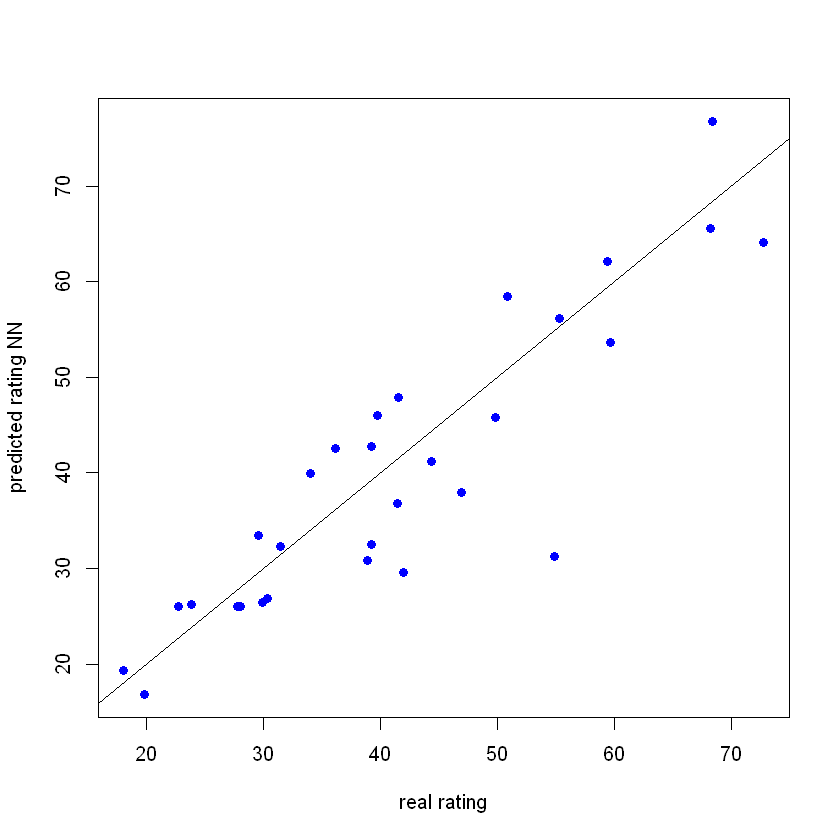

In [18]:
## Prediction using neural network
predict_testNN = compute(NN, testNN[,c(1:5)])
predict_testNN = (predict_testNN$net.result * (max(data$rating) - min(data$rating))) + min(data$rating)
plot(datatest$rating, predict_testNN, col='blue', pch=16, ylab = "predicted rating NN", xlab = "real rating")
abline(0,1)


In [19]:
# Calculate Root Mean Square Error (RMSE)
RMSE.NN = (sum((datatest$rating-predict_testNN)^2)/nrow(datatest))^ 0.5


In [20]:
## Cross validation of neural network model
library(boot)
library(plyr)


In [21]:
# Initialize variables
set.seed(50)
k = 100
RMSE.NN = NULL
List = list( )


In [22]:
# Fit neural network model within nested for loop
for(j in 10:65){
    for (i in 1:k) {
        index = sample(1:nrow(data),j )
        trainNN = scaled[index,]
        testNN = scaled[-index,]
        datatest = data[-index,]
        NN = neuralnet(rating ~ calories + protein + fat + sodium + fiber, trainNN, hidden = 3, linear.output= T)
        predict_testNN = compute(NN,testNN[,c(1:5)])
        predict_testNN = (predict_testNN$net.result*(max(data$rating)-min(data$rating)))+min(data$rating)
        RMSE.NN [i]<- (sum((datatest$rating - predict_testNN)^2)/nrow(datatest))^0.5
    }
List[[j]] = RMSE.NN
}
Matrix.RMSE = do.call(cbind, List)


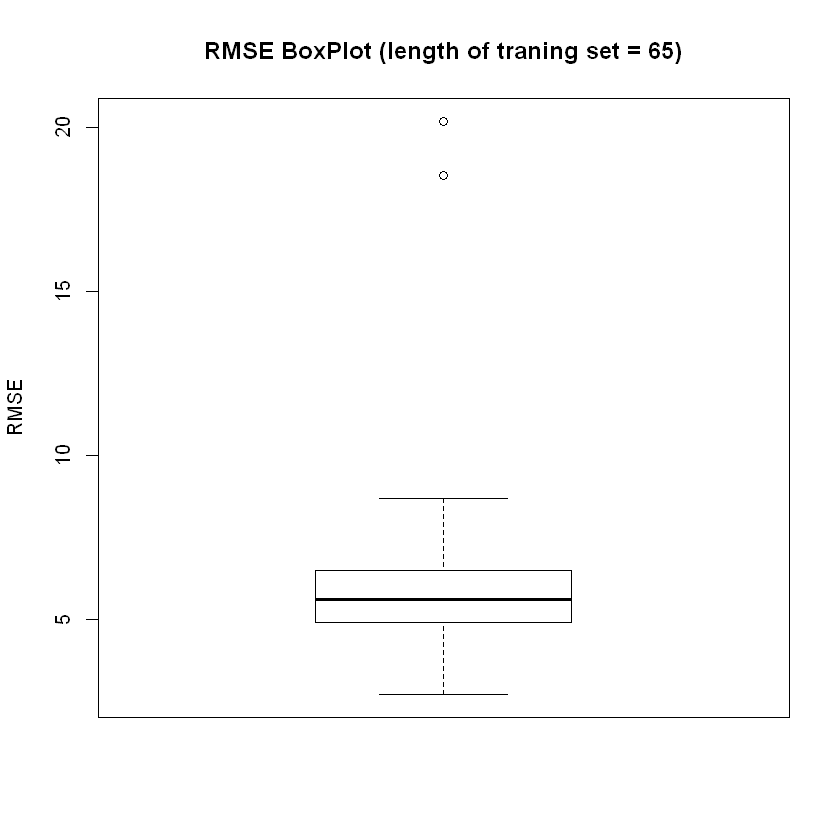

In [23]:
## Prepare boxplot
boxplot(Matrix.RMSE[,56], ylab = "RMSE", main = "RMSE BoxPlot (length of traning set = 65)")



Attaching package: 'matrixStats'

The following object is masked from 'package:plyr':

    count



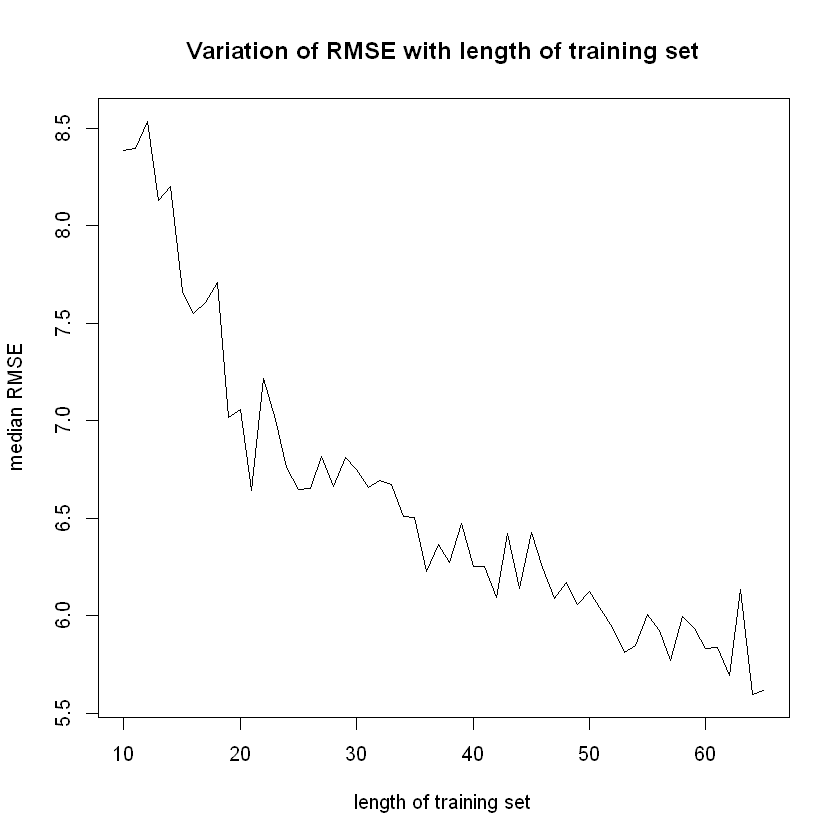

In [24]:
library(matrixStats)
med = colMedians(Matrix.RMSE)
X = seq(10,65)
plot (med~X, type = "l", xlab = "length of training set", ylab = "median RMSE", main = "Variation of RMSE with length of training set")


Unit 3 – Predicting a Polynomial function
Dataset: Synthethic Input: Polynomial Output: Polynomial

In [25]:
#Step 1:  Creating the data set on which we want to do a simple regression. 
set.seed(42) # Set the seed to 42
# 200 random points between -10 and 10 - X is a Vector
x<- runif (200, -10, 10) 
y<-sin(x) # vector Y containing the value of sin(x). 


In [26]:
#Step 2: Create initial weights
weight<- runif (10, -1, 1) # Randomize 10 initial weights 

In [27]:
#Step 3: Split the Data to Train and Test
set.seed(42)
# Cross-validate model with 75% training
index<-sample(1:length(x),round(0.75*length(x)),replace=FALSE) 
reg.train<-data.frame(X=x[index],Y=y[index])
reg.test<-data.frame(X=x[-index],Y=y[-index])


In [28]:
#Step 4: Build the Neural network
library(nnet) # Load the nnet to create your model
set.seed(42)
#3 neuron 1 hidden layer
reg.model.1 <- nnet(reg.train$X,reg.train$Y,size=3,maxit=50,Wts=weight,linout=TRUE) 
str(reg.model.1) # Look at the structure of your model.


# weights:  10
initial  value 110.954499 
iter  10 value 70.129237
iter  20 value 49.540887
iter  30 value 37.185115
iter  40 value 30.634670
iter  50 value 29.927629
final  value 29.927629 
stopped after 50 iterations
List of 15
 $ n            : num [1:3] 1 3 1
 $ nunits       : int 6
 $ nconn        : num [1:7] 0 0 0 2 4 6 10
 $ conn         : num [1:10] 0 1 0 1 0 1 0 2 3 4
 $ nsunits      : num 5
 $ decay        : num 0
 $ entropy      : logi FALSE
 $ softmax      : logi FALSE
 $ censored     : logi FALSE
 $ value        : num 29.9
 $ wts          : num [1:10] -5.43 1.36 6.59 -1.32 1.64 ...
 $ convergence  : int 1
 $ fitted.values: num [1:150, 1] 0.6488 0.3885 -0.4967 -0.2392 0.0895 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : NULL
 $ residuals    : num [1:150, 1] -0.6434 0.2638 -0.1529 -0.1613 -0.0281 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : NULL
 $ call         : language nnet.default(x = reg.train$X, y = reg.train$Y, size = 3, Wts 

 num [1:50, 1] -1.022 -0.287 -0.833 -0.281 0.651 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : NULL


[1] 3.894301

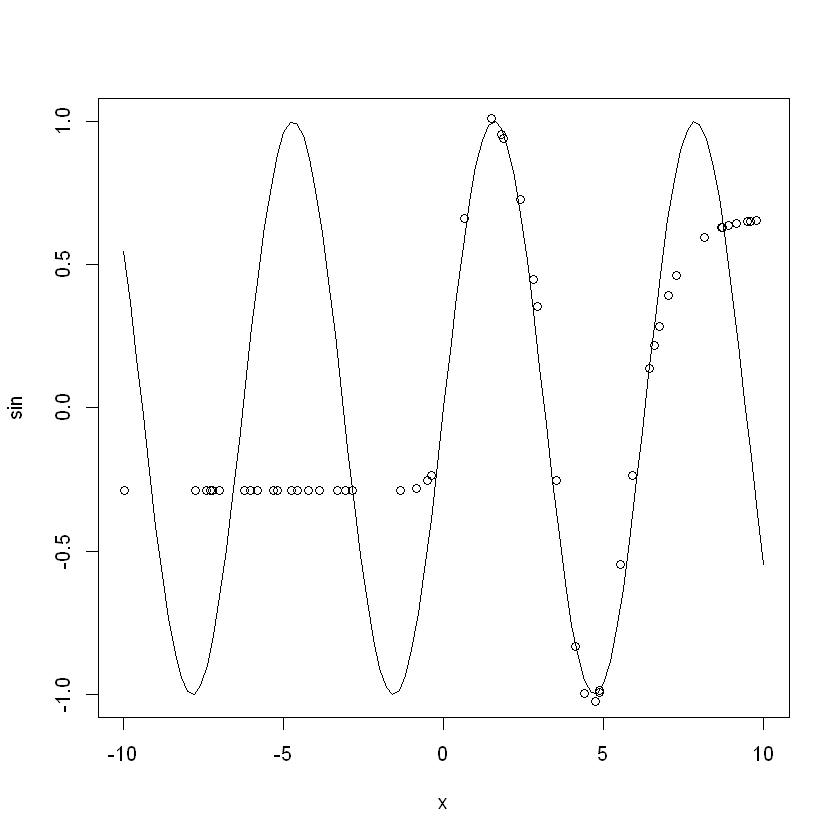

In [29]:
#Step 5: Predict the output for the test set and compute the RMSE 
#Plot the function sin(x) and then plot your predictions.
predict.model.1<-predict(reg.model.1,data.frame(X=reg.test$X))
str(predict.model.1)
rmse.reg<-sqrt(sum((reg.test$Y-predict.model.1)^2))
rmse.reg
plot(sin, -10, 10)
points(reg.test$X,predict.model.1)


# weights:  22
initial  value 372.098787 
iter  10 value 58.093395
iter  20 value 38.898448
iter  30 value 22.575492
iter  40 value 20.900687
iter  50 value 18.497097
final  value 18.497097 
stopped after 50 iterations
List of 15
 $ n            : num [1:3] 1 7 1
 $ nunits       : int 10
 $ nconn        : num [1:11] 0 0 0 2 4 6 8 10 12 14 ...
 $ conn         : num [1:22] 0 1 0 1 0 1 0 1 0 1 ...
 $ nsunits      : num 9
 $ decay        : num 0
 $ entropy      : logi FALSE
 $ softmax      : logi FALSE
 $ censored     : logi FALSE
 $ value        : num 18.5
 $ wts          : num [1:22] 1.266 0.853 10.438 3.841 -0.382 ...
 $ convergence  : int 1
 $ fitted.values: num [1:150, 1] 0.561 0.548 -0.692 -0.518 0.157 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : NULL
 $ residuals    : num [1:150, 1] -0.5559 0.1043 0.0428 0.1173 -0.0955 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : NULL
 $ call         : language nnet.default(x = reg.train$X, y = reg.train$Y

[1] 3.064144

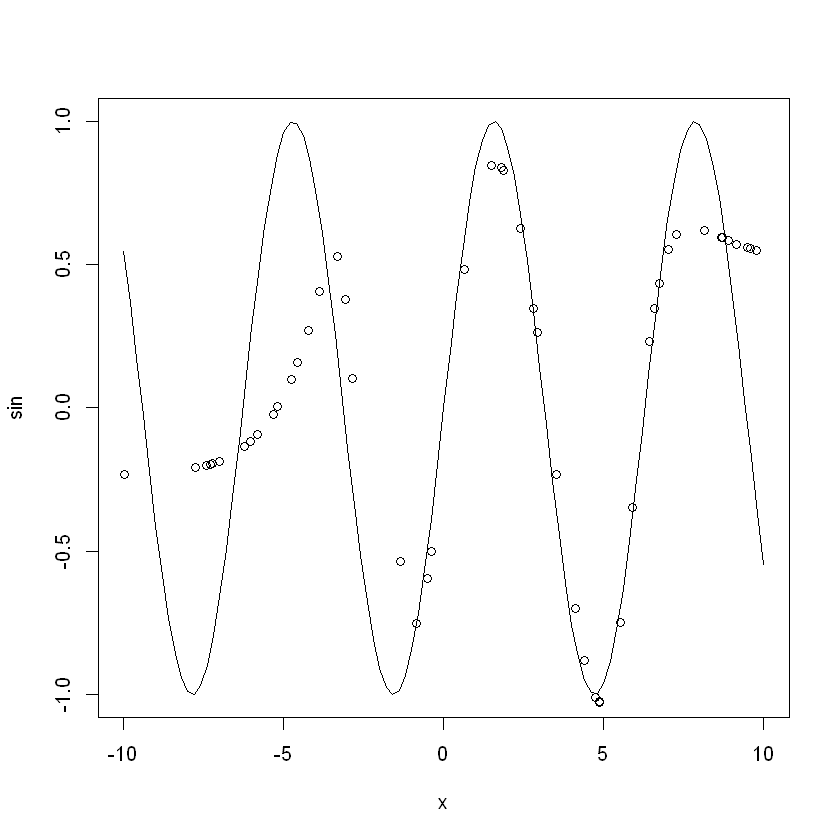

In [30]:
#Step 6:  Increase number of neurons in the hidden layer….
set.seed(42)
reg.model.2<-nnet(reg.train$X,reg.train$Y,size=7,maxit=50,Wts=runif(22, -1, 1),linout=TRUE)
str(reg.model.2)
predict.model.2<-predict(reg.model.2,data.frame(X=reg.test$X))
str(predict.model.2)
rmse.reg<-sqrt(sum((reg.test$Y-predict.model.2)^2))
rmse.reg
plot(sin, -10, 10)
points(reg.test$X, predict.model.2)
 


Unit 4 - Experiments with layers, neurons and error propagation

In [31]:
#Step 1: Prepare the Dataset
library(MASS) # Load MASS package
data<-biopsy # initialize biopsy data
# Scale function using min-max transform between 0 and 1
scale.0.1<-function(x){
  (x-min(x,na.rm=TRUE))/(max(x,na.rm=TRUE)-min(x,na.rm=TRUE))
}


In [32]:
# Normalize data
norm.data<-data.frame(lapply(data[,2:10], function(x) scale.0.1(x)))
norm.data$class<-data$class
str(norm.data) # Checking the structure
sum(is.na(norm.data)) # Checking the sum
norm.data <- norm.data[complete.cases(norm.data),] 


'data.frame':	699 obs. of  10 variables:
 $ V1   : num  0.444 0.444 0.222 0.556 0.333 ...
 $ V2   : num  0 0.333 0 0.778 0 ...
 $ V3   : num  0 0.333 0 0.778 0 ...
 $ V4   : num  0 0.444 0 0 0.222 ...
 $ V5   : num  0.111 0.667 0.111 0.222 0.111 ...
 $ V6   : num  0 1 0.111 0.333 0 ...
 $ V7   : num  0.222 0.222 0.222 0.222 0.222 ...
 $ V8   : num  0 0.111 0 0.667 0 ...
 $ V9   : num  0 0 0 0 0 ...
 $ class: Factor w/ 2 levels "benign","malignant": 1 1 1 1 1 2 1 1 1 1 ...


[1] 16

In [33]:
# Split the dataset to Train and Test
set.seed(42)
index<-sample(1:nrow(norm.data),round(0.75*nrow(norm.data)),replace=FALSE)
train<-norm.data[index,]
test<-norm.data[-index,]


In [34]:
#Step 2: Heuristics to figure out neurons in the hidden layer
# Function that take a training and test data set and a range of integer corresponding to the number of neurons to be used as parameter.
cross.val.nnet<-function(train,test,low_range,high_range){
acc<-NULL
for (h in low_range:high_range) {
temp.nn<-nnet(class~.,size=h,data=train) #train a neural network made with nnet()
pred<-predict(temp.nn,test,type="class") # make prediction on test set
Table<-table(test$class,pred)
accuracy<-sum(diag(Table))/sum(Table) #return the accuracy of the prediction.
acc<-c(acc,accuracy)
  }
return(acc)
}


In [35]:
#Step 3: Determine the number of neurons to use in the hidden layer of the feedforward neural network
set.seed(42)
cross.val.nnet(train,test,1,9) # From the results, we could use 2 or 6 neurons in the hidden layer


# weights:  12
initial  value 364.256592 
iter  10 value 37.801784
iter  20 value 35.137607
iter  30 value 34.866657
iter  40 value 34.645363
iter  50 value 34.346505
iter  60 value 34.321919
iter  70 value 34.313870
iter  80 value 34.257308
iter  90 value 34.256719
iter 100 value 34.220338
final  value 34.220338 
stopped after 100 iterations
# weights:  23
initial  value 335.960256 
iter  10 value 55.598548
iter  20 value 47.596276
iter  30 value 47.516059
iter  40 value 47.461438
iter  50 value 45.744461
iter  60 value 44.832821
iter  70 value 44.825953
iter  80 value 44.824357
final  value 44.823859 
converged
# weights:  34
initial  value 336.224638 
iter  10 value 30.674457
iter  20 value 26.286168
iter  30 value 23.763237
iter  40 value 22.796802
iter  50 value 22.088646
iter  60 value 21.801078
iter  70 value 21.631699
iter  80 value 21.629902
iter  90 value 21.629873
iter 100 value 21.629831
final  value 21.629831 
stopped after 100 iterations
# weights:  45
initial  value 343.

[1] 0.9649123 0.9590643 0.9590643 0.9532164 0.9649123 0.9649123 0.9356725
[8] 0.9590643 0.9590643

In [36]:
#Step 4:  A more powerful package for building a Neural network
library(neuralnet)  
train$class <- as.numeric(train$class)
test$class <- as.numeric(test$class)
n <- names(train)
# This function can only handle numeric value. Can’t deal with factors.
f <- as.formula(paste("class ~", paste(n[!n %in% "class"], collapse = " + "))) 
set.seed(42)
model.neuralnet.1<-neuralnet(f,data=train,hidden=6) # Used 6 neurons
# compute() function to make prediction 
pred.model.1 <- compute(model.neuralnet.1,test[,1:9]) 
pred.model.1$net.result <-round(pred.model.1$net.result)
Table<-table(test$class,pred.model.1$net.result)
Table
accuracy<-sum(diag(Table))/sum(Table) # compute the accuracy of your model 
accuracy


   
      1   2   3
  1 101  10   0
  2  12  47   1

[1] 0.8654971

In [37]:
#Step 5: Resilient Back Propagation
#'rprop-'
set.seed(42)
model.neuralnet.2<-neuralnet(f, data=train, hidden=6, algorithm ='rprop-')
pred.model.2 <- compute(model.neuralnet.2,test[,1:9])
pred.model.2$net.result <-round(pred.model.2$net.result)
pred.model.2$net.result[which(pred.model.2$net.result<=1)]<- 1
pred.model.2$net.result[which(pred.model.2$net.result>=2)]<- 2
Table<-table(test$class,pred.model.2$net.result)
Table
accuracy<-sum(diag(Table))/sum(Table)
accuracy


   
      1   2
  1 105   6
  2   4  56

[1] 0.9415205

In [38]:
#Step 6: Experiment with learning rates
#'learningrate=0.001'
set.seed(42)
model.neuralnet.5<-neuralnet(f, data=train, hidden=6, algorithm ='rprop-', learningrate=0.001)
pred.model.5 <- compute(model.neuralnet.5,test[,1:9])
pred.model.5$net.result <-round(pred.model.5$net.result)
Table<-table(test$class,pred.model.5$net.result)
Table
pred.model.5$net.result[which(pred.model.5$net.result<=1)]<-1
pred.model.5$net.result[which(pred.model.5$net.result>=2)]<-2
Table<-table(test$class,pred.model.5$net.result)
Table
accuracy<-sum(diag(Table))/sum(Table)
accuracy
#'learningrate=1'
set.seed(42)
model.neuralnet.6<-neuralnet(f, data=train, hidden=6, algorithm ='rprop-', learningrate=1)
pred.model.6 <- compute(model.neuralnet.6,test[,1:9])
pred.model.6$net.result <-round(pred.model.6$net.result)
Table<-table(test$class,pred.model.6$net.result)
Table
pred.model.6$net.result[which(pred.model.6$net.result==0)]<-1
Table<-table(test$class,pred.model.6$net.result)
Table
accuracy<-sum(diag(Table))/sum(Table)
accuracy
plot(model.neuralnet.5) # Visual representation of the neural network


   
      0   1   2   3
  1   1 104   5   1
  2   0   4  54   2

   
      1   2
  1 105   6
  2   4  56

[1] 0.9415205

   
      0   1   2   3
  1   1 104   5   1
  2   0   4  54   2

   
      1   2   3
  1 105   5   1
  2   4  54   2

[1] 0.9298246

In [39]:
#Step 7: Using more hidden layers
# create FF NN with three hidden layers of nine neurons
model.neuralnet.7<-neuralnet(f, data=train, hidden=c(9,9,9)) 
pred.model.7 <- compute(model.neuralnet.7,test[,1:9])
pred.model.7$net.result <-round(pred.model.7$net.result) 
Table<-table(test$class,pred.model.7$net.result) 
Table
plot(model.neuralnet.7)# Plot the FF NN of the above


   
      1   2
  1 107   4
  2   4  56

Unit 5 – Credit (Loan) Default Prediction
Dataset: Loans Input: Polynomial Output: Polynomial
Credit scoring is the practice of analyzing a person’s background and credit application in order to assess the creditworthiness of the person. creditworthiness=f(income, age, gender, …). A credit scoring system can be represented by linear regression, logistic regression, machine learning or a combination of these. 

In [43]:
set.seed(1234567890)
dataset <- read.csv("d:/student/creditset.csv")
head(dataset)


clientid,income,age,loan,LTI,default10yr
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,66155.93,59.01702,8106.5321,0.1225367512,0
2,34415.15,48.11715,6564.7450,0.1907515807,0
3,57317.17,63.10805,8020.9533,0.1399397997,0
4,42709.53,45.75197,6103.6423,0.1429105321,0
5,66952.69,18.58434,8770.0992,0.1309895000,1
6,24904.06,57.47161,15.4986,0.0006223321,0


In [44]:
## Prepare train and Test data sets
trainset <- dataset[1:800, ] # extract a set to train the NN
testset <- dataset[801:2000, ] # select the test set


Now we’ll build a neural network with 4 hidden nodes. The lifesign option refers to the verbosity. The output is not linear and we will use a threshold value of 10%. The neuralnet package uses resilient backpropagation with weight backtracking as its standard algorithm.

In [45]:
## build the neural network (NN)
creditnet <- neuralnet(default10yr ~ LTI + age, trainset, hidden = 4, lifesign = "minimal", linear.output = FALSE, threshold = 0.1)


hidden: 4    thresh: 0.1    rep: 1/1    steps:    7266	error: 0.79202	time: 5.47 secs


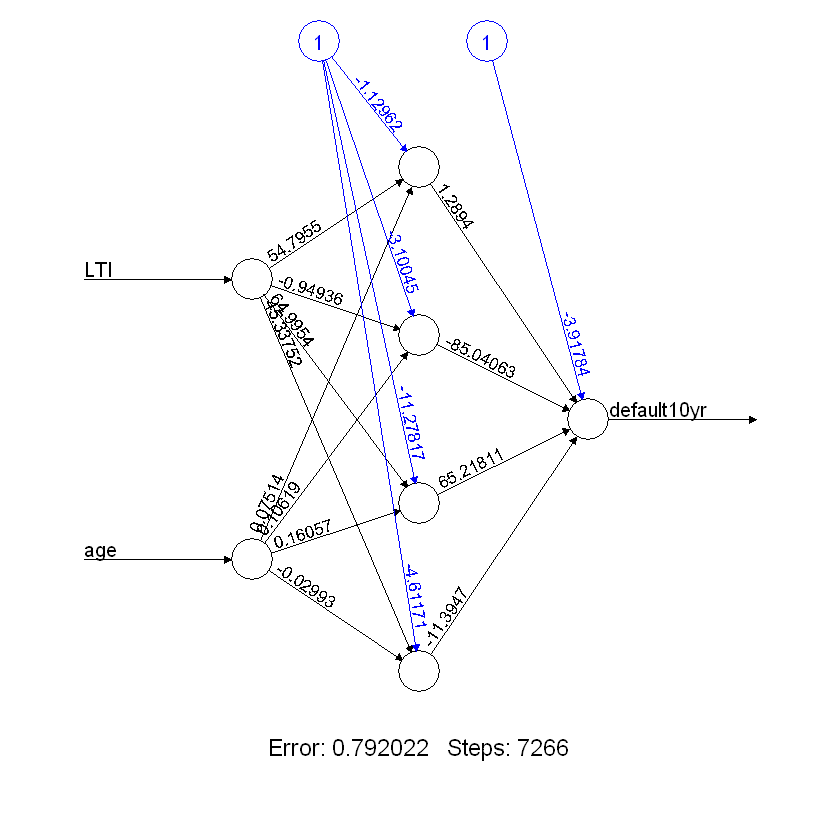

In [46]:
## plot the NN
plot(creditnet, rep = "best")


In [47]:
## test the resulting output
temp_test <- subset(testset, select = c("LTI", "age"))
creditnet.results <- compute(creditnet, temp_test)


The temp dataset contains only the columns LTI and age of the trainset. Only these variables are used for input. The set looks as follows:

In [48]:
head(temp_test)

,LTI,age
,<dbl>,<dbl>
801,0.02306809,25.90645
802,0.13729705,40.77431
803,0.10456985,32.47351
804,0.15985046,53.22813
805,0.11161430,46.47915
806,0.11489364,47.12737


In [49]:
#Let’s have a look at what the neural network produced:
results <- data.frame(actual = testset$default10yr, prediction = creditnet.results$net.result)
results[100:115, ]
results$prediction <-round(results$prediction) # round to improve reading
results[100:115, ]


,actual,prediction
,<int>,<dbl>
900,0,1.596485e-27
901,0,6.516287e-27
902,0,1.640440e-11
903,1,1.000000e+00
904,0,1.381078e-18
905,0,5.396363e-17
906,0,2.345923e-20
907,1,9.581420e-01
908,0,2.499230e-01


,actual,prediction
,<int>,<dbl>
900,0,0
901,0,0
902,0,0
903,1,1
904,0,0
905,0,0
906,0,0
907,1,1
908,0,0


Unit 6 - Auto Encoders  
Dataset: Arrhythmia Input: Quantitative Output: Anomalies


In [50]:
library(h2o)
h2o.init()
# Import ECG train and test data into the H2O cluster
train_ecg <-h2o.importFile("d:/student/ecg_discord_train.csv", header = FALSE)
test_ecg <- h2o.importFile("d:/student/ecg_discord_test.csv", header = FALSE)



----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit http://docs.h2o.ai

----------------------------------------------------------------------


Attaching package: 'h2o'

The following objects are masked from 'package:stats':

    cor, sd, var

The following objects are masked from 'package:base':

    %*%, %in%, &&, ||, apply, as.factor, as.numeric, colnames,
    colnames<-, ifelse, is.character, is.factor, is.numeric, log,
    log10, log1p, log2, round, signif, trunc




H2O is not running yet, starting it now...

Note:  In case of errors look at the following log files:
    C:\Users\ZMHD026\AppData\Local\Temp\RtmpqgmBdd/h2o_ZMHD026_started_from_r.out
    C:\Users\ZMHD026\AppData\Local\Temp\RtmpqgmBdd/h2o_ZMHD026_started_from_r.err


Starting H2O JVM and connecting: .. Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         31 seconds 155 milliseconds 
    H2O cluster timezone:       Asia/Kolkata 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.26.0.2 
    H2O cluster version age:    2 months and 20 days  
    H2O cluster name:           H2O_started_from_R_ZMHD026_bdm834 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   1.77 GB 
    H2O cluster total cores:    2 
    H2O cluster allowed cores:  2 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security

In [51]:
library(h2o)
anomaly_model <-h2o.deeplearning(
 x = names(train_ecg), 
 training_frame = train_ecg, 
 activation = "Tanh", 
 autoencoder = TRUE, 
 hidden = c(50,20,50), 
 sparse = TRUE,
 l1 = 1e-4, 
 epochs = 100)


  |======================================================================| 100%


In [52]:
# Compute reconstruction error with the Anomaly 
# detection app (MSE between output and input layers)
recon_error <- h2o.anomaly(anomaly_model, test_ecg)


Reconstruction.MSE
<dbl>
0.12016540
0.11679301
0.12052862
0.23609355
0.15657577
0.11236363
0.09088669
0.07153324
0.08373915


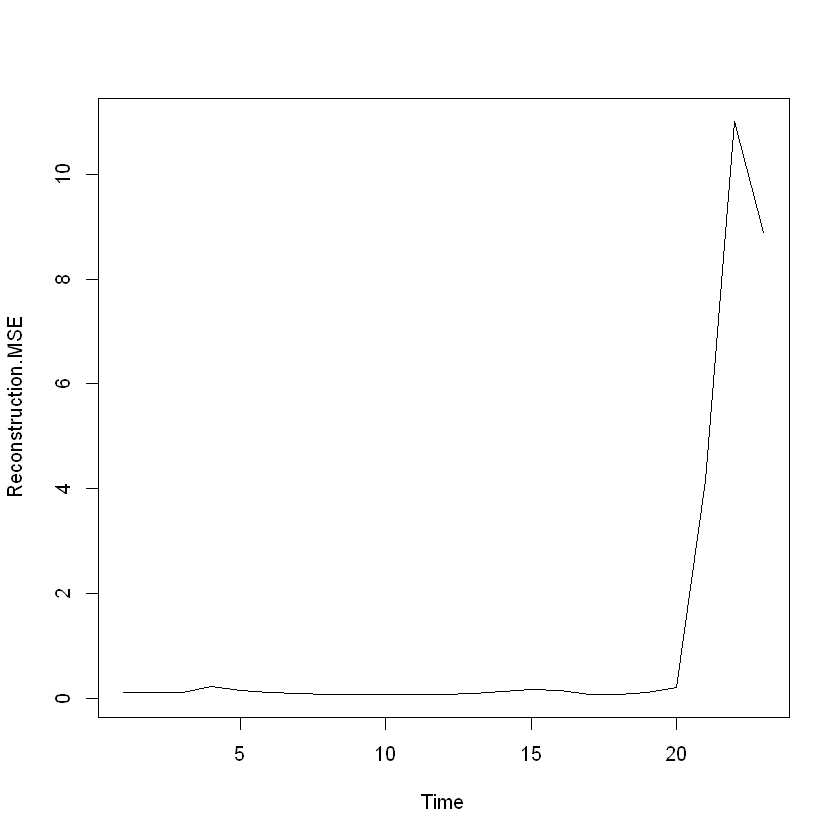

In [53]:
# Pull reconstruction error data and plot to find outliers(last 3 heartbeats)
recon_error <- as.data.frame(recon_error)
recon_error
plot.ts(recon_error)


In [54]:
# Note: Testing = Reconstructing the test dataset
test_recon <- h2o.predict(anomaly_model, test_ecg) 
head(test_recon)
#h2o.saveModel(anomaly_model,"d:/student/anomaly_model.bin")
h2o.download_pojo(anomaly_model, "d:/student/anomaly_model.bin", get_jar = TRUE)


  |======================================================================| 100%


reconstr_C1,reconstr_C2,reconstr_C3,reconstr_C4,reconstr_C5,reconstr_C6,reconstr_C7,reconstr_C8,reconstr_C9,reconstr_C10,...,reconstr_C201,reconstr_C202,reconstr_C203,reconstr_C204,reconstr_C205,reconstr_C206,reconstr_C207,reconstr_C208,reconstr_C209,reconstr_C210
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4.827983,5.318295,4.505627,4.374127,4.374470,4.469204,5.113427,5.234231,6.086419,5.234824,...,4.466155,4.727933,3.896319,3.645979,4.753164,5.179819,4.956564,4.074996,5.471911,4.507265
4.807561,5.254866,4.883826,4.457072,4.141107,4.438053,4.862184,5.005914,6.040068,5.514852,...,4.265782,4.843082,3.843316,3.208220,4.545126,5.001521,4.915274,4.492205,4.940113,4.471683
4.751102,5.281501,4.780946,4.416408,4.160967,4.558148,5.015317,4.914119,6.163598,5.447886,...,4.288087,5.042476,3.958674,2.993189,4.598614,4.990618,4.529094,4.314518,4.894326,4.157398
4.602665,5.173775,4.523236,4.493677,4.433215,4.294267,5.461381,4.701265,6.436044,5.078573,...,4.334367,4.814876,3.985838,3.239137,4.704735,5.221146,4.848485,4.073915,5.182289,4.597148
4.584760,5.547857,4.103544,4.629100,4.499874,4.167375,5.330026,4.838733,6.369959,5.045901,...,4.448297,4.913277,3.935464,3.473742,4.577324,5.316589,4.879371,3.944292,5.481727,4.499825
4.486469,5.317944,3.628513,4.444568,5.059795,4.894719,5.848956,5.314235,5.885510,4.866545,...,4.772611,4.915919,4.529762,4.175402,4.803993,4.983957,4.796496,3.411088,5.981792,3.952584


[1] "DeepLearning_model_R_1571284261224_1.java"

Unit 7 - Multilabel Classification
Dataset: Wines Input: Quantitative and Categorical Output: Class labels
This dataset contains the results of a chemical analysis on 3 different kind of wines. The target variable is the label of the wine which is a factor with 3 (unordered) levels. The predictors are all continuous and represent 13 variables obtained as a result of chemical measurements.

In [55]:
#Step 1: Loading the data
# Load data and set variables names
require(neuralnet)
require(nnet)
require(ggplot2)
set.seed(10)
wines <- read.csv("d:/student/wine.csv")
names(wines) <- c("label", "Alcohol","Malic_acid", "Ash",
                  "Alcalinity_of_ash", "Magnesium", "Total_phenols",
                  "Flavanoids", "Nonflavanoid_phenols",
                  "Proanthocyanins", "Color_intensity",
                  "Hue", "OD280_OD315_of_diluted_wines","Proline")
head(wines)


Loading required package: ggplot2


label,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


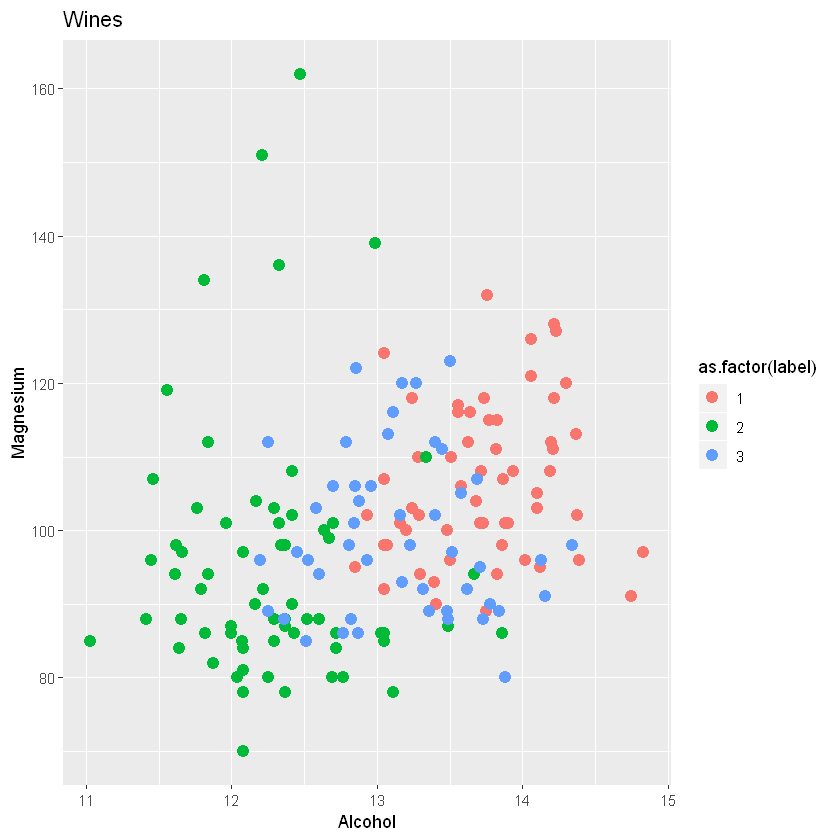

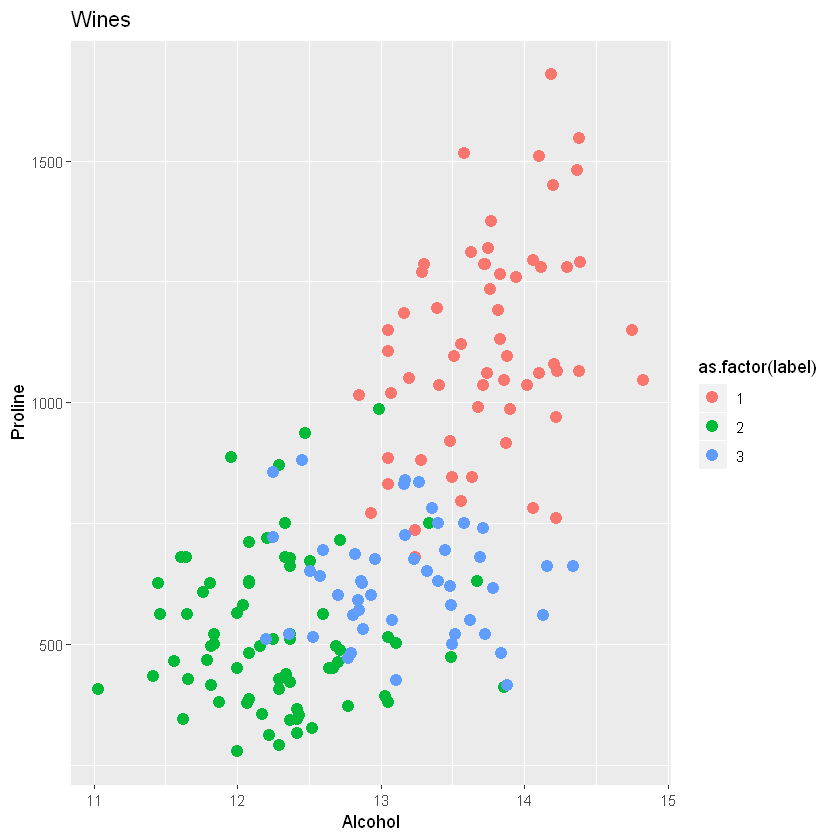

In [56]:
#Step 2: Plots
# Let’s have a look at a plot of some of the variables
plt1 <- ggplot(wines, aes(x = Alcohol, y = Magnesium, colour = as.factor(label))) + geom_point(size=3) + ggtitle("Wines")
plt2 <- ggplot(wines, aes(x = Alcohol, y = Proline, colour = as.factor(label))) +
    geom_point(size=3) + ggtitle("Wines")
plt1
plt2


In [57]:
#Step 2: Pre-processing
# Encode as a one hot vector multilabel data
train <- cbind(wines[, 2:14], class.ind(as.factor(wines$label)))
# Set labels name
names(train) <- c(names(wines)[2:14],"l1","l2","l3")
# Standardize the predictors in the [0−1]">[0−1]  interval with lapply
# Scale data
scl <- function(x){ (x - min(x))/(max(x) - min(x)) }
train[, 1:13] <- data.frame(lapply(train[, 1:13], scl))
head(train)


Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline,l1,l2,l3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.8421053,0.1916996,0.5721925,0.25773196,0.6195652,0.6275862,0.5738397,0.2830189,0.5930599,0.3720137,0.4552846,0.9706960,0.5613409,1,0,0
0.5710526,0.2055336,0.4171123,0.03092784,0.3260870,0.5758621,0.5105485,0.2452830,0.2744479,0.2645051,0.4634146,0.7802198,0.5506419,1,0,0
0.5605263,0.3201581,0.7005348,0.41237113,0.3369565,0.6275862,0.6118143,0.3207547,0.7570978,0.3754266,0.4471545,0.6959707,0.6469330,1,0,0
0.8789474,0.2391304,0.6096257,0.31958763,0.4673913,0.9896552,0.6645570,0.2075472,0.5583596,0.5563140,0.3089431,0.7985348,0.8573466,1,0,0
0.5815789,0.3656126,0.8074866,0.53608247,0.5217391,0.6275862,0.4957806,0.4905660,0.4447950,0.2593857,0.4552846,0.6080586,0.3259629,1,0,0
0.8342105,0.2015810,0.5828877,0.23711340,0.4565217,0.7896552,0.6434599,0.3962264,0.4921136,0.4667235,0.4634146,0.5787546,0.8359486,1,0,0


In [58]:
#Step 3: Fitting the model with neuralnet
# Set up formula
n <- names(train)
f <- as.formula(paste("l1 + l2 + l3 ~", paste(n[!n %in% c("l1","l2","l3")], collapse = " + ")))
f


l1 + l2 + l3 ~ Alcohol + Malic_acid + Ash + Alcalinity_of_ash + 
    Magnesium + Total_phenols + Flavanoids + Nonflavanoid_phenols + 
    Proanthocyanins + Color_intensity + Hue + OD280_OD315_of_diluted_wines + 
    Proline

Note that the characters in the vector are not pasted to the right of the “~” symbol. Just remember to check that the formula is indeed correct and then you are good to go. Let’s train the neural network with the full dataset. It should take very little time to converge. If you did not standardize the predictors it could take a lot more though.

In [59]:
nn <- neuralnet(f, data = train, hidden = c(13, 10, 3), act.fct = "logistic",linear.output = FALSE,lifesign = "minimal")

hidden: 13, 10, 3    thresh: 0.01    rep: 1/1    steps:      89	error: 0.02455	time: 0.19 secs


In [60]:
plot(nn)
# Compute predictions
pr.nn <- compute(nn, train[, 1:13])


In [61]:
# Extract results
pr.nn_ <- pr.nn$net.result
head(pr.nn_)


0.9919754,0.003020934,5.042477e-06
0.9913000,0.003559137,4.524784e-06
0.9920582,0.003003758,4.938348e-06
0.9923104,0.002871484,5.158712e-06
0.9872282,0.005115707,5.583214e-06
0.9923760,0.002874163,4.903709e-06


In [62]:
# Accuracy (training set)
original_values <- max.col(train[, 14:16])
pr.nn_2 <- max.col(pr.nn_)
mean(pr.nn_2 == original_values)


[1] 1

In [63]:
#Step 4: Cross validating the classifier
# Set seed for reproducibility purposes
set.seed(500)
# 10 fold cross validation
k <- 10
# Results from cv
outs <- NULL


In [64]:
# Train test split proportions
proportion <- 0.95 # Set to 0.995 for LOOCV


In [65]:
# Crossvalidate, go!
for(i in 1:k)
{
    index <- sample(1:nrow(train), round(proportion*nrow(train)))
    train_cv <- train[index, ]
    test_cv <- train[-index, ]
    nn_cv <- neuralnet(f,
                        data = train_cv,
                        hidden = c(13, 10, 3),
                        act.fct = "logistic",
                        linear.output = FALSE)
    
        pr.nn <- compute(nn_cv, test_cv[, 1:13]) # Compute predictions
    
    pr.nn_ <- pr.nn$net.result # Extract results
    # Accuracy (test set)
    original_values <- max.col(test_cv[, 14:16])
    pr.nn_2 <- max.col(pr.nn_)
    outs[i] <- mean(pr.nn_2 == original_values)
}
mean(outs) # 98.8% - Great!!


[1] 1

Unit 8 - Forecasting with RNN
Dataset: Milk Input: Time Series Output: Prediction


Loading required package: rnn


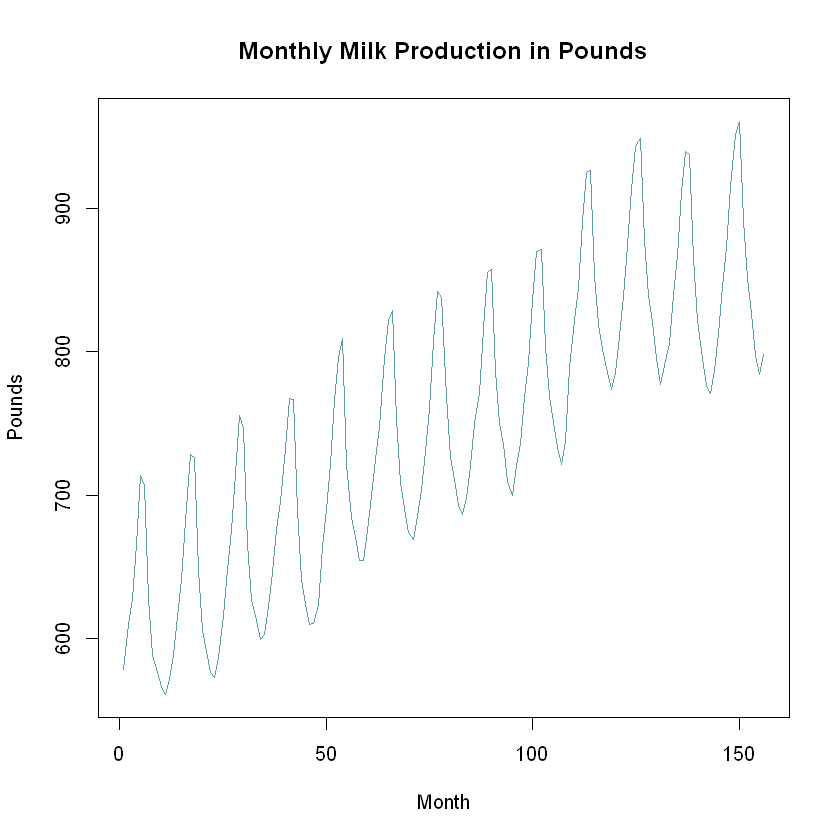

Trained epoch: 1 - Learning rate: 0.04
Epoch error: 0.204190618692431
Trained epoch: 2 - Learning rate: 0.04
Epoch error: 0.201588873633725
Trained epoch: 3 - Learning rate: 0.04
Epoch error: 0.199806896465164
Trained epoch: 4 - Learning rate: 0.04
Epoch error: 0.198218411787619
Trained epoch: 5 - Learning rate: 0.04
Epoch error: 0.197660378739984
Trained epoch: 6 - Learning rate: 0.04
Epoch error: 0.196636730928609
Trained epoch: 7 - Learning rate: 0.04
Epoch error: 0.196453060639468
Trained epoch: 8 - Learning rate: 0.04
Epoch error: 0.196050474316214
Trained epoch: 9 - Learning rate: 0.04
Epoch error: 0.195653806448028
Trained epoch: 10 - Learning rate: 0.04
Epoch error: 0.195483945130326
Trained epoch: 11 - Learning rate: 0.04
Epoch error: 0.195168984225044
Trained epoch: 12 - Learning rate: 0.04
Epoch error: 0.195152351307414
Trained epoch: 13 - Learning rate: 0.04
Epoch error: 0.194852216678861
Trained epoch: 14 - Learning rate: 0.04
Epoch error: 0.194548329493148
Trained epoch: 

Epoch error: 0.16817867823268
Trained epoch: 117 - Learning rate: 0.04
Epoch error: 0.16768826420755
Trained epoch: 118 - Learning rate: 0.04
Epoch error: 0.167373739479256
Trained epoch: 119 - Learning rate: 0.04
Epoch error: 0.166974878241389
Trained epoch: 120 - Learning rate: 0.04
Epoch error: 0.166475190349146
Trained epoch: 121 - Learning rate: 0.04
Epoch error: 0.166037476872437
Trained epoch: 122 - Learning rate: 0.04
Epoch error: 0.165565481006089
Trained epoch: 123 - Learning rate: 0.04
Epoch error: 0.165210976275742
Trained epoch: 124 - Learning rate: 0.04
Epoch error: 0.164768024005034
Trained epoch: 125 - Learning rate: 0.04
Epoch error: 0.164115936256717
Trained epoch: 126 - Learning rate: 0.04
Epoch error: 0.163829721418829
Trained epoch: 127 - Learning rate: 0.04
Epoch error: 0.16335314383234
Trained epoch: 128 - Learning rate: 0.04
Epoch error: 0.162951973704324
Trained epoch: 129 - Learning rate: 0.04
Epoch error: 0.162493722298092
Trained epoch: 130 - Learning rate: 

Trained epoch: 231 - Learning rate: 0.04
Epoch error: 0.119865875403591
Trained epoch: 232 - Learning rate: 0.04
Epoch error: 0.11974797155612
Trained epoch: 233 - Learning rate: 0.04
Epoch error: 0.119408351544559
Trained epoch: 234 - Learning rate: 0.04
Epoch error: 0.119073630350577
Trained epoch: 235 - Learning rate: 0.04
Epoch error: 0.118769584582957
Trained epoch: 236 - Learning rate: 0.04
Epoch error: 0.118518925729008
Trained epoch: 237 - Learning rate: 0.04
Epoch error: 0.118156361963706
Trained epoch: 238 - Learning rate: 0.04
Epoch error: 0.117698404707232
Trained epoch: 239 - Learning rate: 0.04
Epoch error: 0.117557976563525
Trained epoch: 240 - Learning rate: 0.04
Epoch error: 0.117153092508461
Trained epoch: 241 - Learning rate: 0.04
Epoch error: 0.116843123640352
Trained epoch: 242 - Learning rate: 0.04
Epoch error: 0.116697414147355
Trained epoch: 243 - Learning rate: 0.04
Epoch error: 0.116357238721081
Trained epoch: 244 - Learning rate: 0.04
Epoch error: 0.116100538

Trained epoch: 345 - Learning rate: 0.04
Epoch error: 0.0963955861792132
Trained epoch: 346 - Learning rate: 0.04
Epoch error: 0.0963335302280701
Trained epoch: 347 - Learning rate: 0.04
Epoch error: 0.0960495119994593
Trained epoch: 348 - Learning rate: 0.04
Epoch error: 0.096007417539295
Trained epoch: 349 - Learning rate: 0.04
Epoch error: 0.095795517141137
Trained epoch: 350 - Learning rate: 0.04
Epoch error: 0.095441472733809
Trained epoch: 351 - Learning rate: 0.04
Epoch error: 0.0955767113837501
Trained epoch: 352 - Learning rate: 0.04
Epoch error: 0.0953526297211594
Trained epoch: 353 - Learning rate: 0.04
Epoch error: 0.0953562322085321
Trained epoch: 354 - Learning rate: 0.04
Epoch error: 0.0953718367786605
Trained epoch: 355 - Learning rate: 0.04
Epoch error: 0.0951257733452995
Trained epoch: 356 - Learning rate: 0.04
Epoch error: 0.0949493339825439
Trained epoch: 357 - Learning rate: 0.04
Epoch error: 0.094815402842223
Trained epoch: 358 - Learning rate: 0.04
Epoch error: 0

Epoch error: 0.0862639856518126
Trained epoch: 458 - Learning rate: 0.04
Epoch error: 0.086205360493768
Trained epoch: 459 - Learning rate: 0.04
Epoch error: 0.0862476764628758
Trained epoch: 460 - Learning rate: 0.04
Epoch error: 0.0860695355077901
Trained epoch: 461 - Learning rate: 0.04
Epoch error: 0.0861729706618309
Trained epoch: 462 - Learning rate: 0.04
Epoch error: 0.086097281339299
Trained epoch: 463 - Learning rate: 0.04
Epoch error: 0.0859839571411523
Trained epoch: 464 - Learning rate: 0.04
Epoch error: 0.0860164359507355
Trained epoch: 465 - Learning rate: 0.04
Epoch error: 0.0858461466602732
Trained epoch: 466 - Learning rate: 0.04
Epoch error: 0.085771024259822
Trained epoch: 467 - Learning rate: 0.04
Epoch error: 0.0857277881104603
Trained epoch: 468 - Learning rate: 0.04
Epoch error: 0.0857451592394842
Trained epoch: 469 - Learning rate: 0.04
Epoch error: 0.085720746647687
Trained epoch: 470 - Learning rate: 0.04
Epoch error: 0.0856332332699078
Trained epoch: 471 - Le

Epoch error: 0.0817982718985303
Trained epoch: 571 - Learning rate: 0.04
Epoch error: 0.0816389073883219
Trained epoch: 572 - Learning rate: 0.04
Epoch error: 0.0815780486849259
Trained epoch: 573 - Learning rate: 0.04
Epoch error: 0.0816992066911816
Trained epoch: 574 - Learning rate: 0.04
Epoch error: 0.0816322238995352
Trained epoch: 575 - Learning rate: 0.04
Epoch error: 0.081568057313608
Trained epoch: 576 - Learning rate: 0.04
Epoch error: 0.0815815455629543
Trained epoch: 577 - Learning rate: 0.04
Epoch error: 0.0815296029293992
Trained epoch: 578 - Learning rate: 0.04
Epoch error: 0.0815151699782683
Trained epoch: 579 - Learning rate: 0.04
Epoch error: 0.0813677646940217
Trained epoch: 580 - Learning rate: 0.04
Epoch error: 0.0813696491874105
Trained epoch: 581 - Learning rate: 0.04
Epoch error: 0.0813465466393913
Trained epoch: 582 - Learning rate: 0.04
Epoch error: 0.0813529893076012
Trained epoch: 583 - Learning rate: 0.04
Epoch error: 0.0813268479918928
Trained epoch: 584 -

Trained epoch: 683 - Learning rate: 0.04
Epoch error: 0.0793081020443638
Trained epoch: 684 - Learning rate: 0.04
Epoch error: 0.079447987058014
Trained epoch: 685 - Learning rate: 0.04
Epoch error: 0.0794538356274937
Trained epoch: 686 - Learning rate: 0.04
Epoch error: 0.0792548850688353
Trained epoch: 687 - Learning rate: 0.04
Epoch error: 0.0793174970362372
Trained epoch: 688 - Learning rate: 0.04
Epoch error: 0.0793561679143225
Trained epoch: 689 - Learning rate: 0.04
Epoch error: 0.0793340220765812
Trained epoch: 690 - Learning rate: 0.04
Epoch error: 0.0793235449337633
Trained epoch: 691 - Learning rate: 0.04
Epoch error: 0.079243170970608
Trained epoch: 692 - Learning rate: 0.04
Epoch error: 0.0792779443721192
Trained epoch: 693 - Learning rate: 0.04
Epoch error: 0.0793496495099154
Trained epoch: 694 - Learning rate: 0.04
Epoch error: 0.0791900705216207
Trained epoch: 695 - Learning rate: 0.04
Epoch error: 0.0791273529695503
Trained epoch: 696 - Learning rate: 0.04
Epoch error:

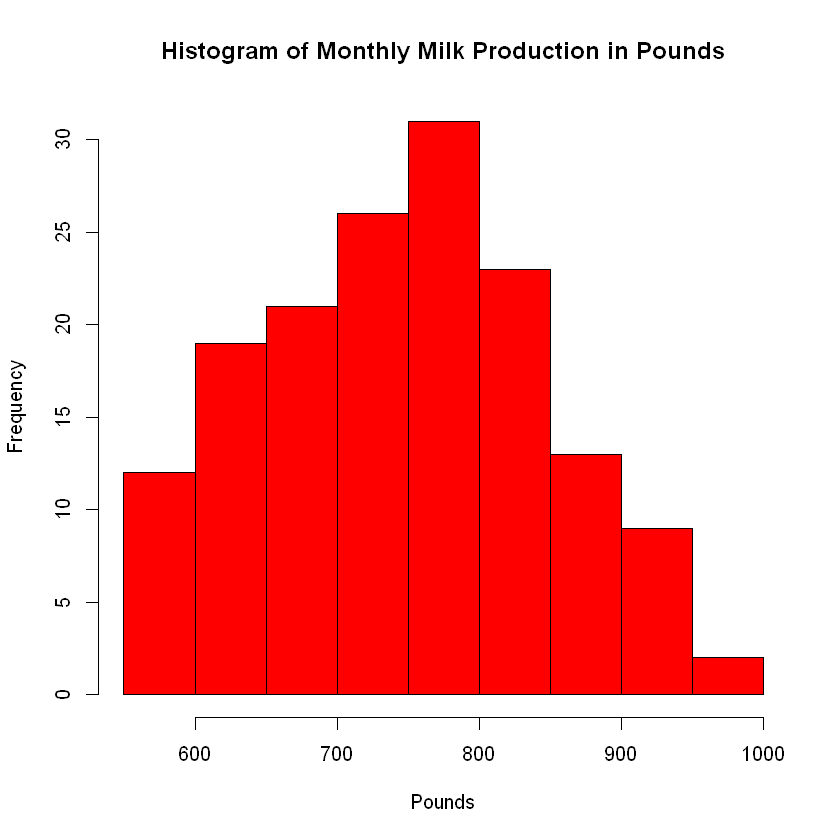

Train MSE:  0.009206429

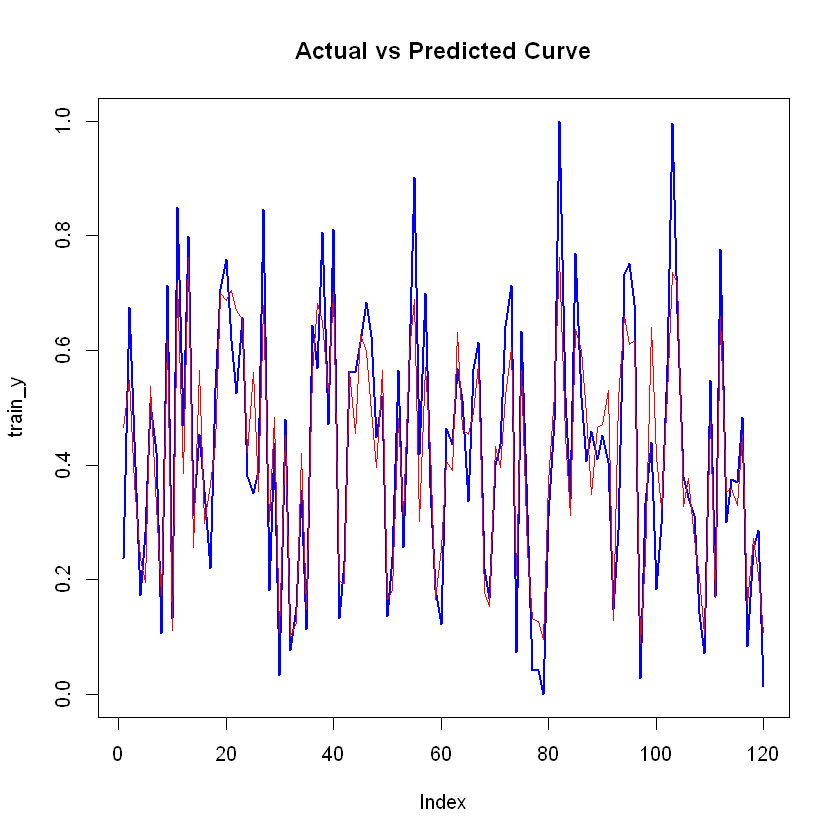

Test MSE:  0.02914414

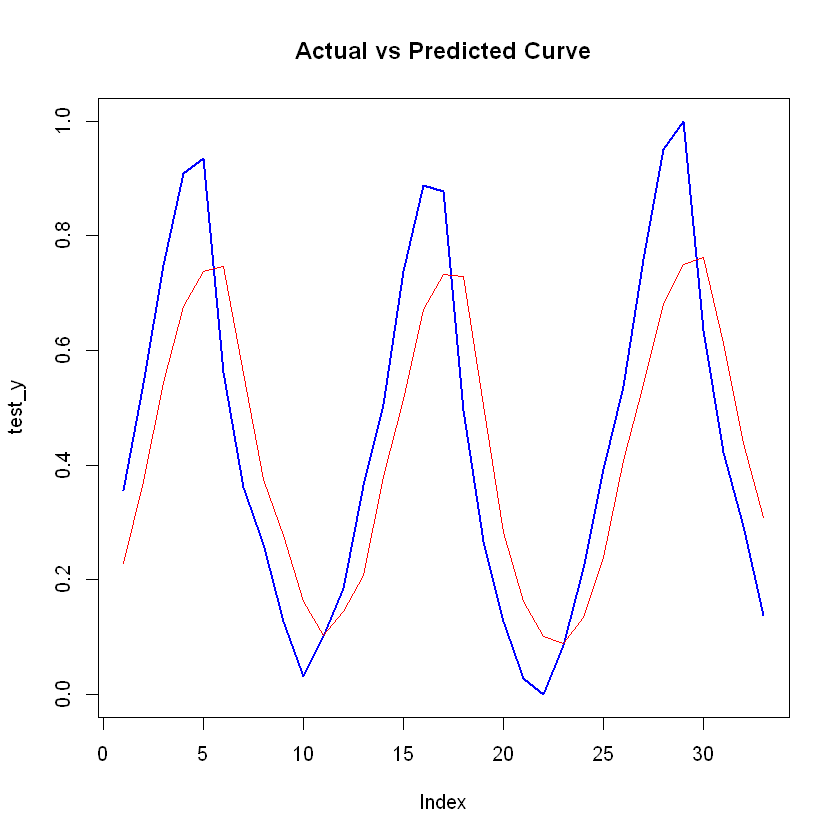

In [66]:

#Load the necessary packages
require(rnn)


#Function to be used later. Creating Training and Test Data Set
dataset <- function(data){
x <- y <- c()
for (i in 1:(nrow(data)-2)){
x <- append(x, data[i, 2])
y <- append(y, data[i+1, 2])
}
#Creating New DataFrame
output <- cbind(x,y)
return(output[1:nrow(output)-1,])
}


#Monthly Milk Production: Pounds Per Cow
data <- read.table("d:/student/milk.csv", header = TRUE, sep = ",")


#Plotting Sequence
plot(data[,2], main = "Monthly Milk Production in Pounds", xlab = "Month", ylab = "Pounds", lwd = 1.5, col = "cadetblue", type = "l")
#Ploting Histogram


#Ploting Histogram
hist(data[,2], main = "Histogram of Monthly Milk Production in Pounds", xlab = "Pounds", col = "red")


#Creating Test and Training Sets
newData <- dataset(data = data)


#Creating Test and Train Data
rows <- sample(1:120, 120)
trainingData <- scale(newData[rows, ])
testData <- scale(newData[-rows, ])




#Max-Min Scaling
x <- trainingData[,1]
y <- trainingData[,2]
train_x <- (x - min(x))/(max(x)-min(x))
train_y <- (y - min(y))/(max(y)-min(y))


#RNN Model
RNN <- trainr(Y = as.matrix(train_x),X = as.matrix(train_y),
learningrate = 0.04, momentum = 0.1, network_type = "rnn", 
numepochs = 700, hidden_dim = 3)


y_h <- predictr(RNN, as.matrix(train_x))

#Comparing Plots of Predicted Curve vs Actual Curve: Training Data
library(Metrics)
plot(train_y, col = "blue", type = "l", main = "Actual vs Predicted Curve", lwd = 2)
lines(y_h, type = "l", col = "red", lwd = 1)
cat("Train MSE: ", mse(y_h, train_y))


#Test Data
testData <- scale(newData[-rows, ])
x <- testData[,1]
y <- testData[,2]


test_x <- (x - min(x))/(max(x)-min(x))
test_y <- (y - min(y))/(max(y)-min(y))


y_h2 <- predictr(RNN, as.matrix(test_x))

#Comparing Plots of Predicted Curve vs Actual Curve: Test Data
plot(test_y, col = "blue", type = "l", main = "Actual vs Predicted Curve", lwd = 2)
lines(y_h2, type = "l", col = "red", lwd = 1)
cat("Test MSE: ", mse(y_h2, test_y))

Unit 9 - Stock predictions (Time series)
Dataset: Euro Stock Input: Time Series Output: Prediction


In [69]:
#Step 1: Prepare the Data
library(datasets)
str(EuStockMarkets)
data<-EuStockMarkets[,1]
df.data<-as.data.frame(t(matrix(data, 1)))


 Time-Series [1:1860, 1:4] from 1991 to 1999: 1629 1614 1607 1621 1618 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:4] "DAX" "SMI" "CAC" "FTSE"


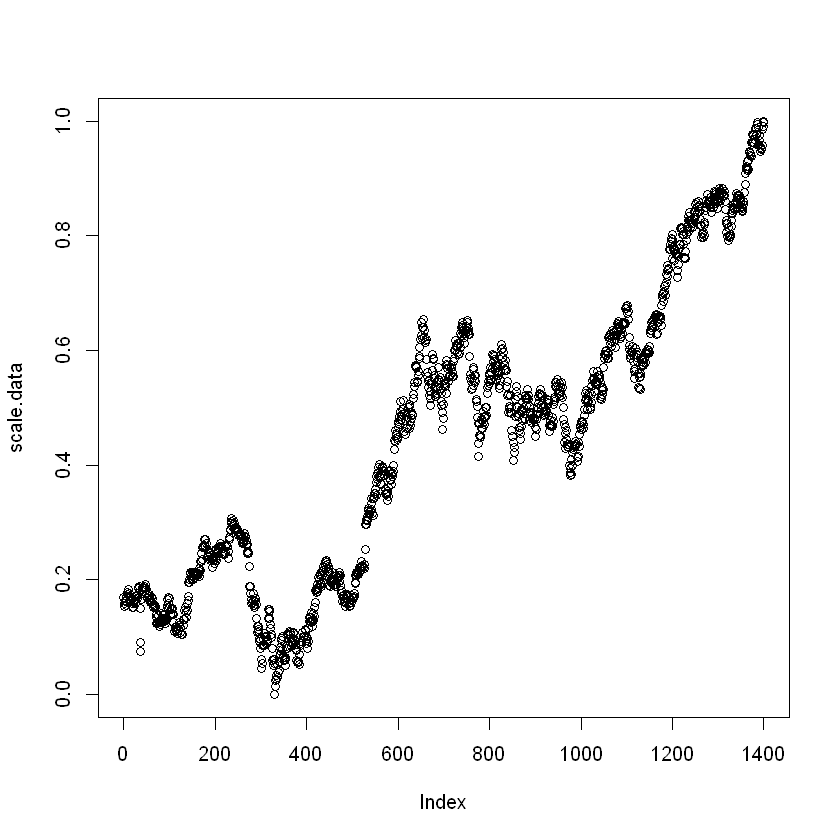

In [70]:
## Scale
scale.0.1<-function(x){
  return ((x-min(x,na.rm=TRUE))/(max(x,na.rm=TRUE)-min(x,na.rm=TRUE)))
}
scale.data<-scale.0.1(df.data[1:1400,])
plot(scale.data)


In [71]:
#Step 2: Create Train/Test Datasets
#10 samples of 140 observations
X<-matrix(scale.data[1:1400],nrow=140)
Y<-matrix(c(scale.data[2:1400],0),nrow=140)
X <- t(X)
Y <- t(Y)


In [72]:
#Step 3 : Prepare and run RNN 
library(rnn)
set.seed(42)
index<-sample(1:10,8,replace=FALSE)
model.stock.1hl<-trainr(Y[index,],X[index,],learningrate = 0.01, hidden_dim = 1,numepochs = 500)


Trained epoch: 1 - Learning rate: 0.01
Epoch error: 30.128522894547
Trained epoch: 2 - Learning rate: 0.01
Epoch error: 29.6860914775286
Trained epoch: 3 - Learning rate: 0.01
Epoch error: 29.6019662457218
Trained epoch: 4 - Learning rate: 0.01
Epoch error: 29.6033350532991
Trained epoch: 5 - Learning rate: 0.01
Epoch error: 29.6876072833873
Trained epoch: 6 - Learning rate: 0.01
Epoch error: 29.5643496753112
Trained epoch: 7 - Learning rate: 0.01
Epoch error: 30.3747905896184
Trained epoch: 8 - Learning rate: 0.01
Epoch error: 29.9827092909736
Trained epoch: 9 - Learning rate: 0.01
Epoch error: 29.7862345733933
Trained epoch: 10 - Learning rate: 0.01
Epoch error: 29.7584658390527
Trained epoch: 11 - Learning rate: 0.01
Epoch error: 29.9039855373901
Trained epoch: 12 - Learning rate: 0.01
Epoch error: 29.7226129773867
Trained epoch: 13 - Learning rate: 0.01
Epoch error: 29.7169590968179
Trained epoch: 14 - Learning rate: 0.01
Epoch error: 30.1278218651882
Trained epoch: 15 - Learning r

Epoch error: 29.7429036358052
Trained epoch: 119 - Learning rate: 0.01
Epoch error: 30.0412323864106
Trained epoch: 120 - Learning rate: 0.01
Epoch error: 29.7549800872494
Trained epoch: 121 - Learning rate: 0.01
Epoch error: 29.8393778090353
Trained epoch: 122 - Learning rate: 0.01
Epoch error: 29.8858441343473
Trained epoch: 123 - Learning rate: 0.01
Epoch error: 29.8868026231787
Trained epoch: 124 - Learning rate: 0.01
Epoch error: 29.8523247601346
Trained epoch: 125 - Learning rate: 0.01
Epoch error: 29.7333227278505
Trained epoch: 126 - Learning rate: 0.01
Epoch error: 29.7219470722406
Trained epoch: 127 - Learning rate: 0.01
Epoch error: 29.7707741085867
Trained epoch: 128 - Learning rate: 0.01
Epoch error: 29.8272961514241
Trained epoch: 129 - Learning rate: 0.01
Epoch error: 29.7199399524985
Trained epoch: 130 - Learning rate: 0.01
Epoch error: 29.6854259749873
Trained epoch: 131 - Learning rate: 0.01
Epoch error: 29.7969554103042
Trained epoch: 132 - Learning rate: 0.01
Epoch 

Epoch error: 24.2383687808875
Trained epoch: 235 - Learning rate: 0.01
Epoch error: 24.1319652769991
Trained epoch: 236 - Learning rate: 0.01
Epoch error: 24.0353554975026
Trained epoch: 237 - Learning rate: 0.01
Epoch error: 23.9085802864946
Trained epoch: 238 - Learning rate: 0.01
Epoch error: 23.8124830768688
Trained epoch: 239 - Learning rate: 0.01
Epoch error: 23.7142239810779
Trained epoch: 240 - Learning rate: 0.01
Epoch error: 23.6344086945422
Trained epoch: 241 - Learning rate: 0.01
Epoch error: 23.5294225273992
Trained epoch: 242 - Learning rate: 0.01
Epoch error: 23.4640648993558
Trained epoch: 243 - Learning rate: 0.01
Epoch error: 23.3466095973406
Trained epoch: 244 - Learning rate: 0.01
Epoch error: 23.2789607830626
Trained epoch: 245 - Learning rate: 0.01
Epoch error: 23.1794540143601
Trained epoch: 246 - Learning rate: 0.01
Epoch error: 23.1158246027373
Trained epoch: 247 - Learning rate: 0.01
Epoch error: 22.9822098245591
Trained epoch: 248 - Learning rate: 0.01
Epoch 

Epoch error: 16.7288782366083
Trained epoch: 351 - Learning rate: 0.01
Epoch error: 16.7185232995313
Trained epoch: 352 - Learning rate: 0.01
Epoch error: 16.667753418107
Trained epoch: 353 - Learning rate: 0.01
Epoch error: 16.6682791497519
Trained epoch: 354 - Learning rate: 0.01
Epoch error: 16.6422793317503
Trained epoch: 355 - Learning rate: 0.01
Epoch error: 16.6257060243418
Trained epoch: 356 - Learning rate: 0.01
Epoch error: 16.5916036600855
Trained epoch: 357 - Learning rate: 0.01
Epoch error: 16.5944843203279
Trained epoch: 358 - Learning rate: 0.01
Epoch error: 16.5901821937104
Trained epoch: 359 - Learning rate: 0.01
Epoch error: 16.5606636932265
Trained epoch: 360 - Learning rate: 0.01
Epoch error: 16.5241453655598
Trained epoch: 361 - Learning rate: 0.01
Epoch error: 16.5310027234436
Trained epoch: 362 - Learning rate: 0.01
Epoch error: 16.5008809616284
Trained epoch: 363 - Learning rate: 0.01
Epoch error: 16.4908534402545
Trained epoch: 364 - Learning rate: 0.01
Epoch e

Epoch error: 16.0511863066829
Trained epoch: 467 - Learning rate: 0.01
Epoch error: 16.0497300296034
Trained epoch: 468 - Learning rate: 0.01
Epoch error: 16.0516019623136
Trained epoch: 469 - Learning rate: 0.01
Epoch error: 16.050750970758
Trained epoch: 470 - Learning rate: 0.01
Epoch error: 16.0482444682765
Trained epoch: 471 - Learning rate: 0.01
Epoch error: 16.0504610963548
Trained epoch: 472 - Learning rate: 0.01
Epoch error: 16.0505541007137
Trained epoch: 473 - Learning rate: 0.01
Epoch error: 16.0505018089983
Trained epoch: 474 - Learning rate: 0.01
Epoch error: 16.0514258565317
Trained epoch: 475 - Learning rate: 0.01
Epoch error: 16.0497325383027
Trained epoch: 476 - Learning rate: 0.01
Epoch error: 16.0502196890245
Trained epoch: 477 - Learning rate: 0.01
Epoch error: 16.0509691734413
Trained epoch: 478 - Learning rate: 0.01
Epoch error: 16.0495193671194
Trained epoch: 479 - Learning rate: 0.01
Epoch error: 16.049035109136
Trained epoch: 480 - Learning rate: 0.01
Epoch er

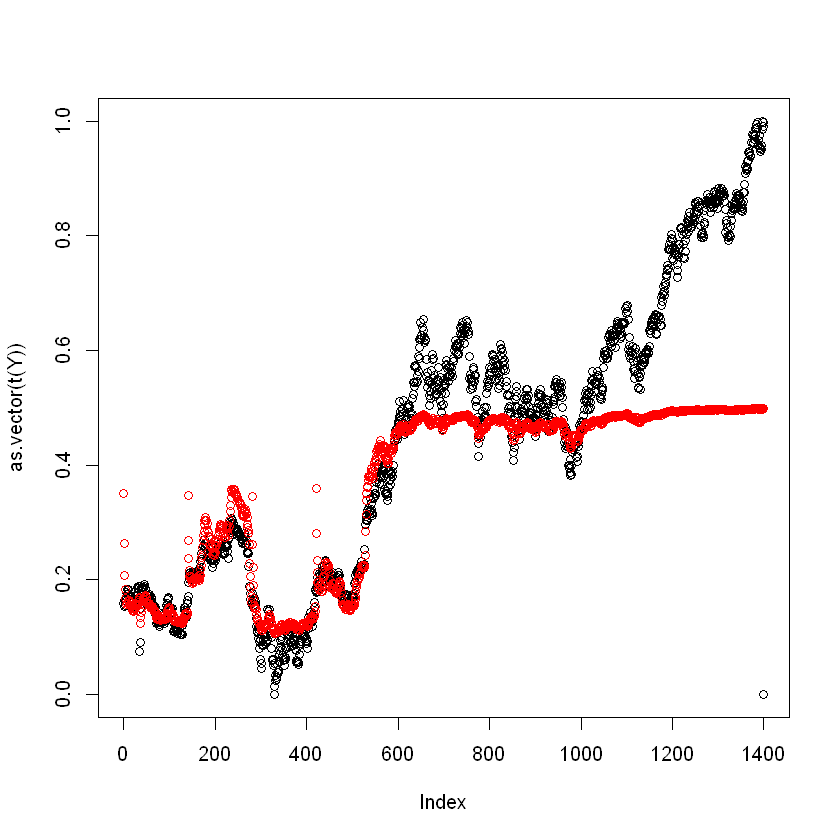

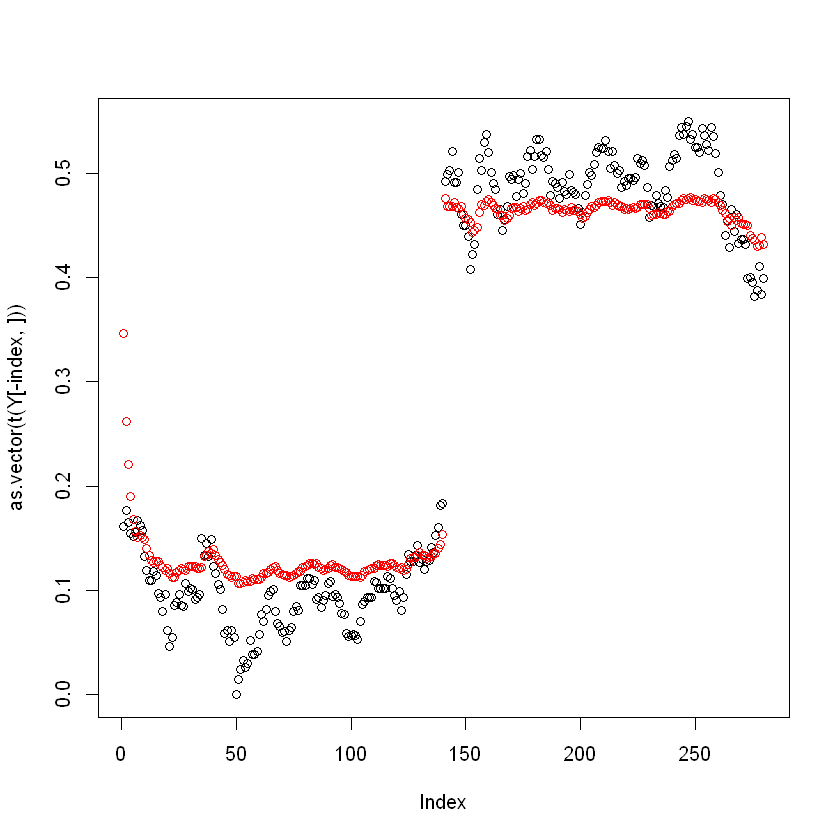

In [73]:
#Step 4: Predict the stock prices
pred.1hl <- predictr(model.stock.1hl, X)
plot(as.vector(t(Y)))
points(as.vector(t(pred.1hl)),col='red')
plot(as.vector(t(Y[-index,])))
points(as.vector(t(pred.1hl[-index,])),col='red')


Trained epoch: 1 - Learning rate: 0.01
Epoch error: 34.8604143890386
Trained epoch: 2 - Learning rate: 0.01
Epoch error: 36.4998861681254
Trained epoch: 3 - Learning rate: 0.01
Epoch error: 30.1517086101796
Trained epoch: 4 - Learning rate: 0.01
Epoch error: 31.209427747041
Trained epoch: 5 - Learning rate: 0.01
Epoch error: 30.7359271586665
Trained epoch: 6 - Learning rate: 0.01
Epoch error: 31.154742839529
Trained epoch: 7 - Learning rate: 0.01
Epoch error: 30.872366657927
Trained epoch: 8 - Learning rate: 0.01
Epoch error: 30.2531612120073
Trained epoch: 9 - Learning rate: 0.01
Epoch error: 25.7436232138819
Trained epoch: 10 - Learning rate: 0.01
Epoch error: 30.4955617061963
Trained epoch: 11 - Learning rate: 0.01
Epoch error: 32.1646008432985
Trained epoch: 12 - Learning rate: 0.01
Epoch error: 27.6397333817158
Trained epoch: 13 - Learning rate: 0.01
Epoch error: 28.6742964587341
Trained epoch: 14 - Learning rate: 0.01
Epoch error: 23.5864089897293
Trained epoch: 15 - Learning rat

Epoch error: 4.03912277439546
Trained epoch: 119 - Learning rate: 0.01
Epoch error: 4.05035322382908
Trained epoch: 120 - Learning rate: 0.01
Epoch error: 4.01930887895217
Trained epoch: 121 - Learning rate: 0.01
Epoch error: 4.40385904158012
Trained epoch: 122 - Learning rate: 0.01
Epoch error: 4.17224751360614
Trained epoch: 123 - Learning rate: 0.01
Epoch error: 4.02489266801672
Trained epoch: 124 - Learning rate: 0.01
Epoch error: 3.99390932368121
Trained epoch: 125 - Learning rate: 0.01
Epoch error: 4.02396327170227
Trained epoch: 126 - Learning rate: 0.01
Epoch error: 3.89282643921562
Trained epoch: 127 - Learning rate: 0.01
Epoch error: 4.10109940923169
Trained epoch: 128 - Learning rate: 0.01
Epoch error: 3.93758227198673
Trained epoch: 129 - Learning rate: 0.01
Epoch error: 4.05456487341154
Trained epoch: 130 - Learning rate: 0.01
Epoch error: 4.17392646197687
Trained epoch: 131 - Learning rate: 0.01
Epoch error: 3.9546923182896
Trained epoch: 132 - Learning rate: 0.01
Epoch e

Epoch error: 3.742805931061
Trained epoch: 235 - Learning rate: 0.01
Epoch error: 3.57990593172894
Trained epoch: 236 - Learning rate: 0.01
Epoch error: 3.64873623195996
Trained epoch: 237 - Learning rate: 0.01
Epoch error: 3.56890591468947
Trained epoch: 238 - Learning rate: 0.01
Epoch error: 3.78148466011389
Trained epoch: 239 - Learning rate: 0.01
Epoch error: 3.68123770672253
Trained epoch: 240 - Learning rate: 0.01
Epoch error: 3.68668761217764
Trained epoch: 241 - Learning rate: 0.01
Epoch error: 3.92906407425721
Trained epoch: 242 - Learning rate: 0.01
Epoch error: 3.70078635420604
Trained epoch: 243 - Learning rate: 0.01
Epoch error: 3.64810482431443
Trained epoch: 244 - Learning rate: 0.01
Epoch error: 3.50944162131375
Trained epoch: 245 - Learning rate: 0.01
Epoch error: 3.77381095135373
Trained epoch: 246 - Learning rate: 0.01
Epoch error: 3.57029897285902
Trained epoch: 247 - Learning rate: 0.01
Epoch error: 3.62477581148184
Trained epoch: 248 - Learning rate: 0.01
Epoch er

Epoch error: 3.51134626960852
Trained epoch: 351 - Learning rate: 0.01
Epoch error: 3.4381413592438
Trained epoch: 352 - Learning rate: 0.01
Epoch error: 3.30210302352406
Trained epoch: 353 - Learning rate: 0.01
Epoch error: 3.54649611082885
Trained epoch: 354 - Learning rate: 0.01
Epoch error: 3.42226636540505
Trained epoch: 355 - Learning rate: 0.01
Epoch error: 3.31788089819911
Trained epoch: 356 - Learning rate: 0.01
Epoch error: 3.34504091067805
Trained epoch: 357 - Learning rate: 0.01
Epoch error: 3.33811467475026
Trained epoch: 358 - Learning rate: 0.01
Epoch error: 3.51693179279215
Trained epoch: 359 - Learning rate: 0.01
Epoch error: 3.31614488412025
Trained epoch: 360 - Learning rate: 0.01
Epoch error: 3.35754930179471
Trained epoch: 361 - Learning rate: 0.01
Epoch error: 3.59162002870228
Trained epoch: 362 - Learning rate: 0.01
Epoch error: 3.42110805662763
Trained epoch: 363 - Learning rate: 0.01
Epoch error: 3.77238663097733
Trained epoch: 364 - Learning rate: 0.01
Epoch e

Epoch error: 3.10844749937628
Trained epoch: 467 - Learning rate: 0.01
Epoch error: 3.15203511502622
Trained epoch: 468 - Learning rate: 0.01
Epoch error: 3.28524085053658
Trained epoch: 469 - Learning rate: 0.01
Epoch error: 3.20208197102355
Trained epoch: 470 - Learning rate: 0.01
Epoch error: 3.07604432798156
Trained epoch: 471 - Learning rate: 0.01
Epoch error: 3.16018445784079
Trained epoch: 472 - Learning rate: 0.01
Epoch error: 3.23581048114901
Trained epoch: 473 - Learning rate: 0.01
Epoch error: 3.16694056935972
Trained epoch: 474 - Learning rate: 0.01
Epoch error: 3.25974970036751
Trained epoch: 475 - Learning rate: 0.01
Epoch error: 3.2826716516788
Trained epoch: 476 - Learning rate: 0.01
Epoch error: 3.26307963338622
Trained epoch: 477 - Learning rate: 0.01
Epoch error: 3.22034183325384
Trained epoch: 478 - Learning rate: 0.01
Epoch error: 3.15765202937297
Trained epoch: 479 - Learning rate: 0.01
Epoch error: 3.33508606858788
Trained epoch: 480 - Learning rate: 0.01
Epoch e

[1] 0.2466339

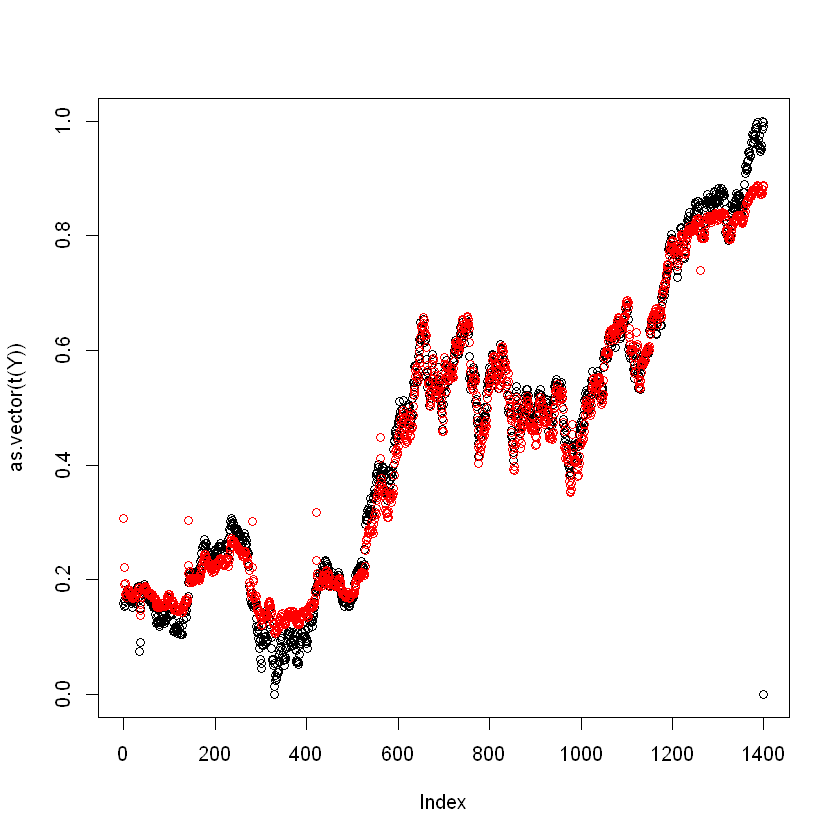

In [74]:
#Step 5: Increase the hidden layers 
model.stock.10hl<-trainr(Y[index,],X[index,],learningrate = 0.01, hidden_dim = 10,numepochs = 500)
pred.10hl <- predictr(model.stock.10hl, X)
plot(as.vector(t(Y)))
points(as.vector(t(pred.10hl)),col='red')
rmse.10.hl<-sqrt((sum(Y[-index,]-pred.10hl[-index,])^2)/(nrow(Y[-index,])*ncol(Y[-index,])))
rmse.10.hl


Trained epoch: 1 - Learning rate: 0.01
Epoch error: 12.6351483256848
Trained epoch: 2 - Learning rate: 0.01
Epoch error: 11.9745033903917
Trained epoch: 3 - Learning rate: 0.01
Epoch error: 11.3699939446362
Trained epoch: 4 - Learning rate: 0.01
Epoch error: 11.4288879301284
Trained epoch: 5 - Learning rate: 0.01
Epoch error: 10.2722377216211
Trained epoch: 6 - Learning rate: 0.01
Epoch error: 10.6821271829925
Trained epoch: 7 - Learning rate: 0.01
Epoch error: 10.3733237741395
Trained epoch: 8 - Learning rate: 0.01
Epoch error: 10.1559177840523
Trained epoch: 9 - Learning rate: 0.01
Epoch error: 9.6161548707746
Trained epoch: 10 - Learning rate: 0.01
Epoch error: 10.1450330677525
Trained epoch: 11 - Learning rate: 0.01
Epoch error: 9.38261975617283
Trained epoch: 12 - Learning rate: 0.01
Epoch error: 8.94608231591417
Trained epoch: 13 - Learning rate: 0.01
Epoch error: 8.7760828689693
Trained epoch: 14 - Learning rate: 0.01
Epoch error: 8.56435816366607
Trained epoch: 15 - Learning ra

Epoch error: 1.51632961677863
Trained epoch: 119 - Learning rate: 0.01
Epoch error: 1.58999369356706
Trained epoch: 120 - Learning rate: 0.01
Epoch error: 1.50523830664546
Trained epoch: 121 - Learning rate: 0.01
Epoch error: 1.50767455099411
Trained epoch: 122 - Learning rate: 0.01
Epoch error: 1.54288941249934
Trained epoch: 123 - Learning rate: 0.01
Epoch error: 1.50056187254355
Trained epoch: 124 - Learning rate: 0.01
Epoch error: 1.47047325808323
Trained epoch: 125 - Learning rate: 0.01
Epoch error: 1.53132543942221
Trained epoch: 126 - Learning rate: 0.01
Epoch error: 1.499301576298
Trained epoch: 127 - Learning rate: 0.01
Epoch error: 1.50859797514235
Trained epoch: 128 - Learning rate: 0.01
Epoch error: 1.50415085736525
Trained epoch: 129 - Learning rate: 0.01
Epoch error: 1.46882433944642
Trained epoch: 130 - Learning rate: 0.01
Epoch error: 1.47307091598849
Trained epoch: 131 - Learning rate: 0.01
Epoch error: 1.46275901824679
Trained epoch: 132 - Learning rate: 0.01
Epoch er

Epoch error: 1.415096595747
Trained epoch: 235 - Learning rate: 0.01
Epoch error: 1.37646107950555
Trained epoch: 236 - Learning rate: 0.01
Epoch error: 1.33996829939261
Trained epoch: 237 - Learning rate: 0.01
Epoch error: 1.42364832003085
Trained epoch: 238 - Learning rate: 0.01
Epoch error: 1.39007301996655
Trained epoch: 239 - Learning rate: 0.01
Epoch error: 1.36916863725833
Trained epoch: 240 - Learning rate: 0.01
Epoch error: 1.39610486032232
Trained epoch: 241 - Learning rate: 0.01
Epoch error: 1.37888859870378
Trained epoch: 242 - Learning rate: 0.01
Epoch error: 1.39215688428908
Trained epoch: 243 - Learning rate: 0.01
Epoch error: 1.39139713251246
Trained epoch: 244 - Learning rate: 0.01
Epoch error: 1.35589916969358
Trained epoch: 245 - Learning rate: 0.01
Epoch error: 1.37510137635541
Trained epoch: 246 - Learning rate: 0.01
Epoch error: 1.40574604759746
Trained epoch: 247 - Learning rate: 0.01
Epoch error: 1.44799837385096
Trained epoch: 248 - Learning rate: 0.01
Epoch er

Epoch error: 1.29830592870552
Trained epoch: 351 - Learning rate: 0.01
Epoch error: 1.24886418658896
Trained epoch: 352 - Learning rate: 0.01
Epoch error: 1.31106716059573
Trained epoch: 353 - Learning rate: 0.01
Epoch error: 1.28277060388598
Trained epoch: 354 - Learning rate: 0.01
Epoch error: 1.34024954532059
Trained epoch: 355 - Learning rate: 0.01
Epoch error: 1.29814873559999
Trained epoch: 356 - Learning rate: 0.01
Epoch error: 1.31011882955308
Trained epoch: 357 - Learning rate: 0.01
Epoch error: 1.26790667933241
Trained epoch: 358 - Learning rate: 0.01
Epoch error: 1.27522400339859
Trained epoch: 359 - Learning rate: 0.01
Epoch error: 1.28306188688083
Trained epoch: 360 - Learning rate: 0.01
Epoch error: 1.25799662500227
Trained epoch: 361 - Learning rate: 0.01
Epoch error: 1.3032185604516
Trained epoch: 362 - Learning rate: 0.01
Epoch error: 1.25058902264933
Trained epoch: 363 - Learning rate: 0.01
Epoch error: 1.37307627378089
Trained epoch: 364 - Learning rate: 0.01
Epoch e

Epoch error: 1.24706194564277
Trained epoch: 467 - Learning rate: 0.01
Epoch error: 1.23997754470351
Trained epoch: 468 - Learning rate: 0.01
Epoch error: 1.23380117706051
Trained epoch: 469 - Learning rate: 0.01
Epoch error: 1.2515282408471
Trained epoch: 470 - Learning rate: 0.01
Epoch error: 1.22716773227667
Trained epoch: 471 - Learning rate: 0.01
Epoch error: 1.19140416950361
Trained epoch: 472 - Learning rate: 0.01
Epoch error: 1.21223841391113
Trained epoch: 473 - Learning rate: 0.01
Epoch error: 1.20931440989822
Trained epoch: 474 - Learning rate: 0.01
Epoch error: 1.24362854199994
Trained epoch: 475 - Learning rate: 0.01
Epoch error: 1.24716634312552
Trained epoch: 476 - Learning rate: 0.01
Epoch error: 1.22093112836178
Trained epoch: 477 - Learning rate: 0.01
Epoch error: 1.25318221091997
Trained epoch: 478 - Learning rate: 0.01
Epoch error: 1.2669434335692
Trained epoch: 479 - Learning rate: 0.01
Epoch error: 1.22257690066975
Trained epoch: 480 - Learning rate: 0.01
Epoch er

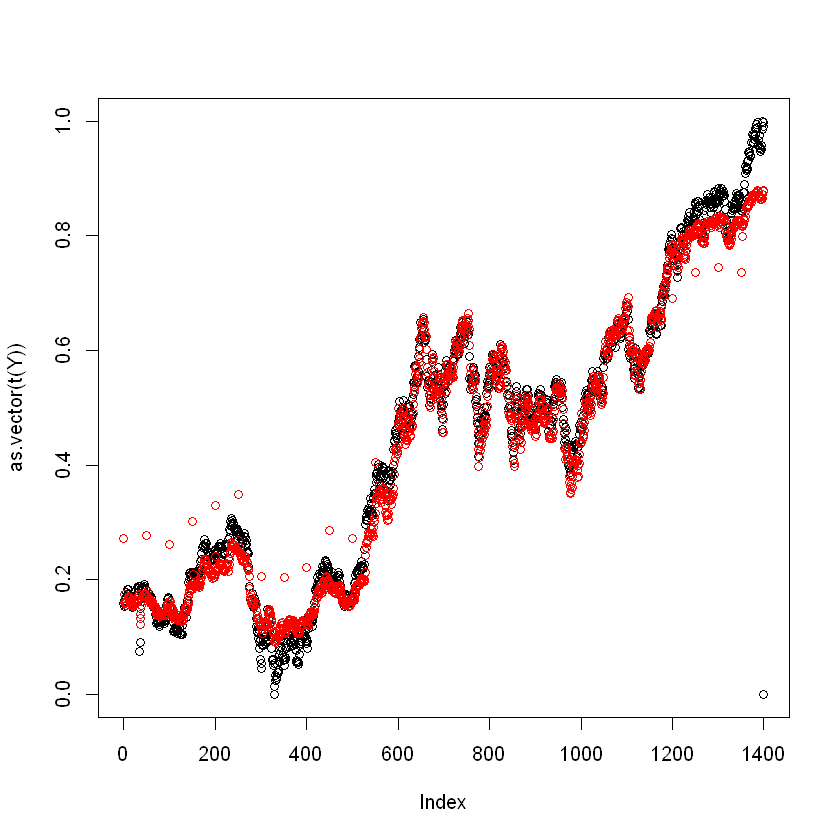

[1] 0.2118812

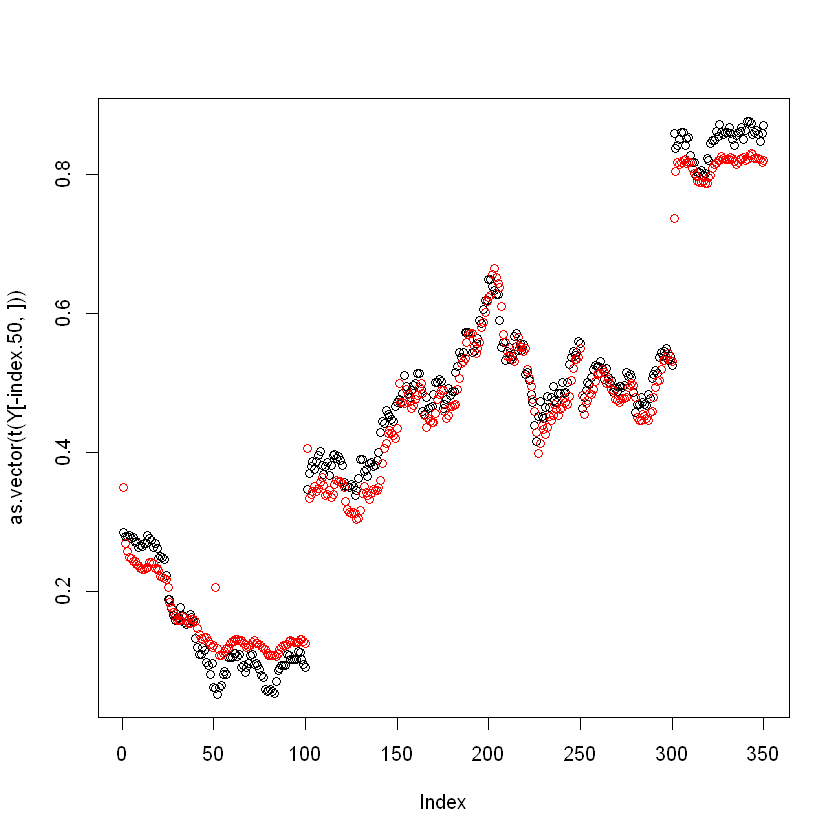

In [75]:
#Step 6: Change the Sample Size
X<-matrix(scale.data[1:1400],nrow=50)
Y<-matrix(c(scale.data[2:1400],0),nrow=50)
X <- t(X)
Y <- t(Y)
set.seed(42)
index.50<-sample(1:28,21,replace=FALSE)
model.stock.50<-trainr(Y[index.50,],X[index.50,],learningrate = 0.01, hidden_dim = 10,numepochs = 500)
pred.50 <- predictr(model.stock.50, X)
plot(as.vector(t(Y)))
points(as.vector(t(pred.50)),col='red')
plot(as.vector(t(Y[-index.50,])))
points(as.vector(t(pred.50[-index.50,])),col='red')
rmse.50<-sqrt((sum(Y[-index.50,]-pred.50[-index.50,])^2)/(nrow(Y[-index.50,])*ncol(Y[-index.50,])))
rmse.50


Trained epoch: 1 - Learning rate: 0.01
Epoch error: 4.37590256323395
Trained epoch: 2 - Learning rate: 0.01
Epoch error: 3.81337293361095
Trained epoch: 3 - Learning rate: 0.01
Epoch error: 3.57130412887897
Trained epoch: 4 - Learning rate: 0.01
Epoch error: 3.69720901568758
Trained epoch: 5 - Learning rate: 0.01
Epoch error: 3.69908631990549
Trained epoch: 6 - Learning rate: 0.01
Epoch error: 3.72938426213698
Trained epoch: 7 - Learning rate: 0.01
Epoch error: 3.68958934056337
Trained epoch: 8 - Learning rate: 0.01
Epoch error: 3.57776410124075
Trained epoch: 9 - Learning rate: 0.01
Epoch error: 3.69293555473522
Trained epoch: 10 - Learning rate: 0.01
Epoch error: 3.64870087404038
Trained epoch: 11 - Learning rate: 0.01
Epoch error: 3.78441404553763
Trained epoch: 12 - Learning rate: 0.01
Epoch error: 3.67405378266635
Trained epoch: 13 - Learning rate: 0.01
Epoch error: 3.5372196775412
Trained epoch: 14 - Learning rate: 0.01
Epoch error: 3.62084740232919
Trained epoch: 15 - Learning r

Epoch error: 0.726623708429736
Trained epoch: 118 - Learning rate: 0.01
Epoch error: 0.738519627445372
Trained epoch: 119 - Learning rate: 0.01
Epoch error: 0.723661888623988
Trained epoch: 120 - Learning rate: 0.01
Epoch error: 0.708538056787926
Trained epoch: 121 - Learning rate: 0.01
Epoch error: 0.712578056096591
Trained epoch: 122 - Learning rate: 0.01
Epoch error: 0.711507672125923
Trained epoch: 123 - Learning rate: 0.01
Epoch error: 0.707985622079606
Trained epoch: 124 - Learning rate: 0.01
Epoch error: 0.712549174435819
Trained epoch: 125 - Learning rate: 0.01
Epoch error: 0.700693729593198
Trained epoch: 126 - Learning rate: 0.01
Epoch error: 0.693613192841512
Trained epoch: 127 - Learning rate: 0.01
Epoch error: 0.682230866577086
Trained epoch: 128 - Learning rate: 0.01
Epoch error: 0.707619956433596
Trained epoch: 129 - Learning rate: 0.01
Epoch error: 0.70602029860417
Trained epoch: 130 - Learning rate: 0.01
Epoch error: 0.691211856749911
Trained epoch: 131 - Learning rate

Epoch error: 0.512197381688415
Trained epoch: 232 - Learning rate: 0.01
Epoch error: 0.520193516036355
Trained epoch: 233 - Learning rate: 0.01
Epoch error: 0.500343555899156
Trained epoch: 234 - Learning rate: 0.01
Epoch error: 0.51120823590177
Trained epoch: 235 - Learning rate: 0.01
Epoch error: 0.511702263818835
Trained epoch: 236 - Learning rate: 0.01
Epoch error: 0.508010131992178
Trained epoch: 237 - Learning rate: 0.01
Epoch error: 0.513478761322153
Trained epoch: 238 - Learning rate: 0.01
Epoch error: 0.507676166801748
Trained epoch: 239 - Learning rate: 0.01
Epoch error: 0.491361363191065
Trained epoch: 240 - Learning rate: 0.01
Epoch error: 0.51699140938707
Trained epoch: 241 - Learning rate: 0.01
Epoch error: 0.499662416364846
Trained epoch: 242 - Learning rate: 0.01
Epoch error: 0.500585376798631
Trained epoch: 243 - Learning rate: 0.01
Epoch error: 0.502006804414786
Trained epoch: 244 - Learning rate: 0.01
Epoch error: 0.500489753783977
Trained epoch: 245 - Learning rate:

Epoch error: 0.390663619739716
Trained epoch: 346 - Learning rate: 0.01
Epoch error: 0.398866251211371
Trained epoch: 347 - Learning rate: 0.01
Epoch error: 0.39177236005451
Trained epoch: 348 - Learning rate: 0.01
Epoch error: 0.398661107040744
Trained epoch: 349 - Learning rate: 0.01
Epoch error: 0.398621481288762
Trained epoch: 350 - Learning rate: 0.01
Epoch error: 0.393704146823611
Trained epoch: 351 - Learning rate: 0.01
Epoch error: 0.397081930217644
Trained epoch: 352 - Learning rate: 0.01
Epoch error: 0.396467102320153
Trained epoch: 353 - Learning rate: 0.01
Epoch error: 0.397253195888216
Trained epoch: 354 - Learning rate: 0.01
Epoch error: 0.392319226638287
Trained epoch: 355 - Learning rate: 0.01
Epoch error: 0.387816993641186
Trained epoch: 356 - Learning rate: 0.01
Epoch error: 0.391022611959594
Trained epoch: 357 - Learning rate: 0.01
Epoch error: 0.38884345408303
Trained epoch: 358 - Learning rate: 0.01
Epoch error: 0.387544186206205
Trained epoch: 359 - Learning rate:

Trained epoch: 460 - Learning rate: 0.01
Epoch error: 0.320706274635241
Trained epoch: 461 - Learning rate: 0.01
Epoch error: 0.316016849737412
Trained epoch: 462 - Learning rate: 0.01
Epoch error: 0.321969186898712
Trained epoch: 463 - Learning rate: 0.01
Epoch error: 0.320326558126623
Trained epoch: 464 - Learning rate: 0.01
Epoch error: 0.318783342424061
Trained epoch: 465 - Learning rate: 0.01
Epoch error: 0.320650420804754
Trained epoch: 466 - Learning rate: 0.01
Epoch error: 0.315629656327654
Trained epoch: 467 - Learning rate: 0.01
Epoch error: 0.312374604948761
Trained epoch: 468 - Learning rate: 0.01
Epoch error: 0.317202210995141
Trained epoch: 469 - Learning rate: 0.01
Epoch error: 0.314698370109713
Trained epoch: 470 - Learning rate: 0.01
Epoch error: 0.316880165833451
Trained epoch: 471 - Learning rate: 0.01
Epoch error: 0.314280097292386
Trained epoch: 472 - Learning rate: 0.01
Epoch error: 0.315086422571279
Trained epoch: 473 - Learning rate: 0.01
Epoch error: 0.31357492

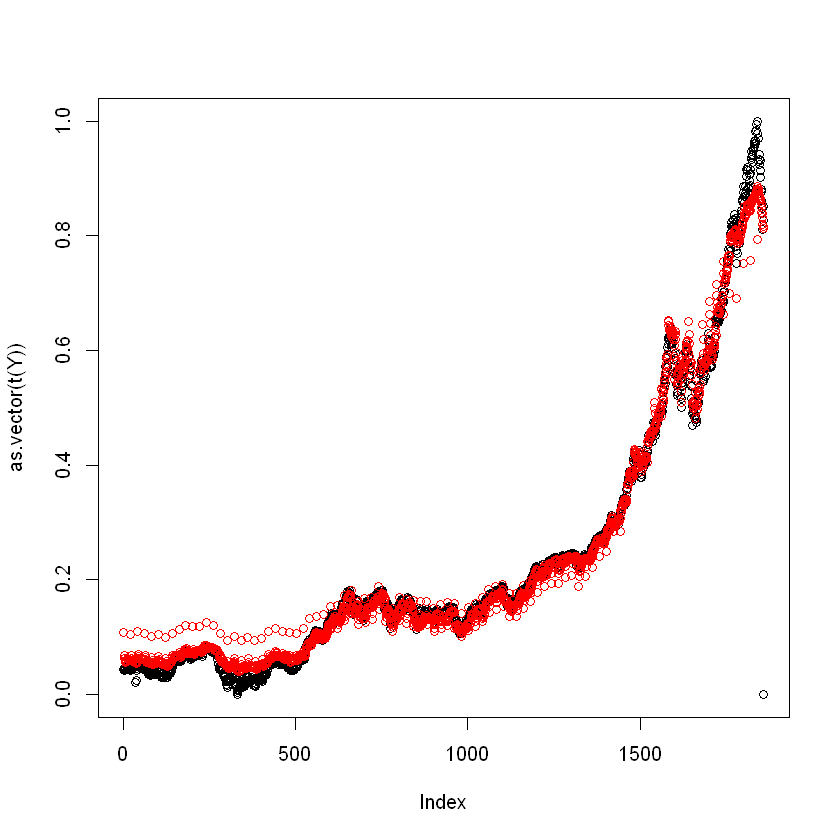

[1] 0.02345659

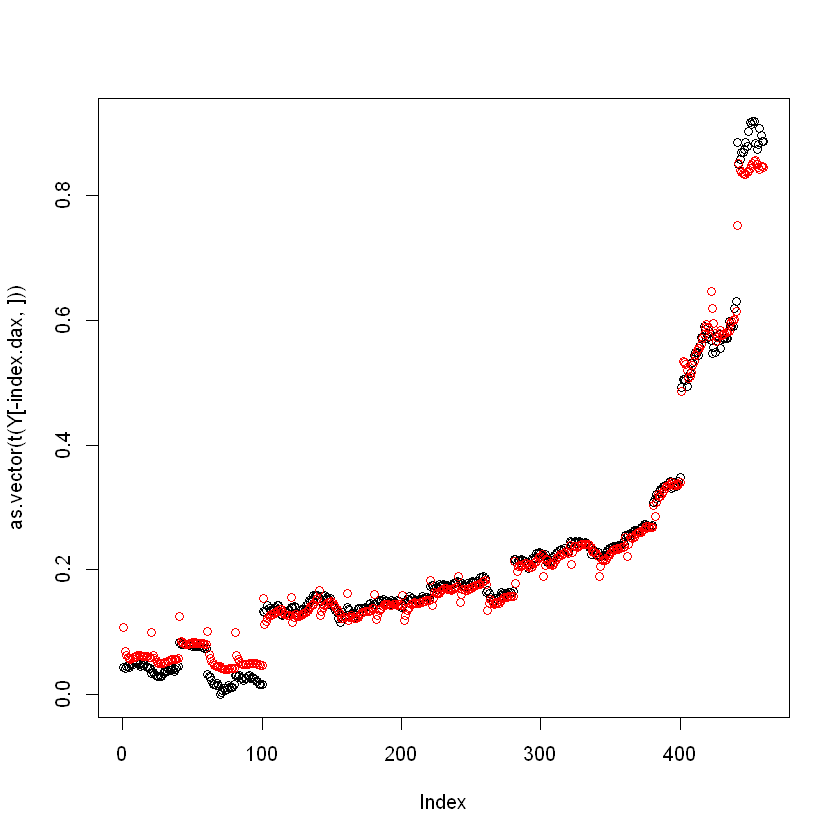

In [76]:
#Step 7:  Use all the observations to train the RNN
dax.data<-scale.0.1(df.data)
#93 samples of 20 observations
X<-matrix(dax.data[1:1860,],nrow=20)
Y<-matrix(c(dax.data[2:1860,],0),nrow=20)
X <- t(X)
Y <- t(Y)
set.seed(42)
index.dax<-sample(1:93,70,replace=FALSE)
model.dax<-trainr(Y[index.dax,],X[index.dax,],learningrate=0.01, hidden_dim = c(10,10),momentum=0.1,numepochs = 500)
pred.dax <- predictr(model.dax, X)
plot(as.vector(t(Y)))
points(as.vector(t(pred.dax)),col='red')
plot(as.vector(t(Y[-index.dax,])))
points(as.vector(t(pred.dax[-index.dax,])),col='red')
rmse.dax<-sqrt((sum(Y[-index.dax,]-pred.dax[-index.dax,])^2)/(nrow(Y[-index.dax,])*ncol(Y[-index.dax,])))
rmse.dax


Unit 10 - Hospital readmissions prediction
Dataset: Diabetes Dataset Input: Quantitative Output: Prediction


The dataset represents ten years (1999-2008) of clinical care at 130 U.S. hospitals. Hospital readmission for diabetic patients is a major concern in the United States. Predicting those patients that are readmitted within 30 days would be useful for efficiency savings, helping doctors’ spot patients at risk of being readmitted.

In [77]:
#load required libraries 
library(dplyr)
library(janitor)
library(caret)



Attaching package: 'dplyr'

The following object is masked from 'package:MASS':

    select

The following object is masked from 'package:matrixStats':

    count

The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from 'package:neuralnet':

    compute

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'janitor'

The following objects are masked from 'package:stats':

    chisq.test, fisher.test

Loading required package: lattice

Attaching package: 'lattice'

The following object is masked from 'package:boot':

    melanoma


Attaching package: 'caret'

The following objects are masked from 'package:Metrics':

    precision, recall



In [78]:
#Step 1: Defining the training data
#Cleansed diabetic data
diabetes <- readr::read_csv("d:/student/diabetic_data.csv", na = c("", "NA", "?", "Unknown/Invalid"))


Parsed with column specification:
cols(
  .default = col_character(),
  encounter_id = col_double(),
  patient_nbr = col_double(),
  weight = col_logical(),
  admission_type_id = col_double(),
  discharge_disposition_id = col_double(),
  admission_source_id = col_double(),
  time_in_hospital = col_double(),
  payer_code = col_logical(),
  num_lab_procedures = col_double(),
  num_procedures = col_double(),
  num_medications = col_double(),
  number_outpatient = col_double(),
  number_emergency = col_double(),
  number_inpatient = col_double(),
  number_diagnoses = col_double()
)
See spec(...) for full column specifications.
Warning message:
"64707 parsing failures.
 row    col           expected   actual                           file
1103 weight 1/0/T/F/TRUE/FALSE [75-100) 'd:/student/diabetic_data.csv'
1109 weight 1/0/T/F/TRUE/FALSE [50-75)  'd:/student/diabetic_data.csv'
1133 weight 1/0/T/F/TRUE/FALSE [0-25)   'd:/student/diabetic_data.csv'
1137 weight 1/0/T/F/TRUE/FALSE [75-100) 'd:

In [79]:
diab_df <- diabetes %>%
  select(-race, -weight, -payer_code,
         -medical_specialty, -diag_1:-diag_3) %>%
  select(-encounter_id:-patient_nbr) %>%
  janitor::clean_names()
glimpse(diab_df)


Observations: 101,766
Variables: 41
$ gender                   <chr> "Female", "Female", "Female", "Male", "Mal...
$ age                      <chr> "[0-10)", "[10-20)", "[20-30)", "[30-40)",...
$ admission_type_id        <dbl> 6, 1, 1, 1, 1, 2, 3, 1, 2, 3, 1, 2, 1, 1, ...
$ discharge_disposition_id <dbl> 25, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 6,...
$ admission_source_id      <dbl> 1, 7, 7, 7, 7, 2, 2, 7, 4, 4, 7, 4, 7, 7, ...
$ time_in_hospital         <dbl> 1, 3, 2, 2, 1, 3, 4, 5, 13, 12, 9, 7, 7, 1...
$ num_lab_procedures       <dbl> 41, 59, 11, 44, 51, 31, 70, 73, 68, 33, 47...
$ num_procedures           <dbl> 0, 0, 5, 1, 0, 6, 1, 0, 2, 3, 2, 0, 0, 1, ...
$ num_medications          <dbl> 1, 18, 13, 16, 8, 16, 21, 12, 28, 18, 17, ...
$ number_outpatient        <dbl> 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ number_emergency         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...
$ number_inpatient         <dbl> 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ number_diagnos

In [80]:
# fix age
diab_df$age <- gsub("[()]", "", diab_df$age)
diab_df$age <- gsub("[[]]", "", diab_df$age)
diab_df$age <- gsub("\\[", "", diab_df$age)


In [81]:
# split string to remove hyphen and convert into numeric
# create new variables then drop uninformative age variables
diab_df$age_low <- as.numeric(stringr::str_split(diab_df$age, "-", simplify = TRUE)[, 1])
diab_df$age_high <- as.numeric(stringr::str_split(diab_df$age, "-", simplify = TRUE)[, 2])
diab_df$age_mid <- round((diab_df$age_low + diab_df$age_high)/2, digits = 0)


In [82]:
# drop redundant, keep age mid
diab_df_aged <- dplyr::select(diab_df,-age, -age_low, -age_high)
# create target / response variable, make binary
diab_df_aged$target <- dplyr::if_else(diab_df_aged$readmitted == "<30", 1, 0)
# drop redundant readmitted, could use later for multiclass prediction
readmitted <- diab_df_aged$readmitted  # store for later
diab_df_tgt <- dplyr::select(diab_df_aged, -readmitted)
glimpse(diab_df_tgt)

Observations: 101,766
Variables: 41
$ gender                   <chr> "Female", "Female", "Female", "Male", "Mal...
$ admission_type_id        <dbl> 6, 1, 1, 1, 1, 2, 3, 1, 2, 3, 1, 2, 1, 1, ...
$ discharge_disposition_id <dbl> 25, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 6,...
$ admission_source_id      <dbl> 1, 7, 7, 7, 7, 2, 2, 7, 4, 4, 7, 4, 7, 7, ...
$ time_in_hospital         <dbl> 1, 3, 2, 2, 1, 3, 4, 5, 13, 12, 9, 7, 7, 1...
$ num_lab_procedures       <dbl> 41, 59, 11, 44, 51, 31, 70, 73, 68, 33, 47...
$ num_procedures           <dbl> 0, 0, 5, 1, 0, 6, 1, 0, 2, 3, 2, 0, 0, 1, ...
$ num_medications          <dbl> 1, 18, 13, 16, 8, 16, 21, 12, 28, 18, 17, ...
$ number_outpatient        <dbl> 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ number_emergency         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...
$ number_inpatient         <dbl> 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ number_diagnoses         <dbl> 1, 9, 6, 7, 5, 9, 7, 8, 8, 8, 9, 7, 8, 8, ...
$ max_glu_serum 

In [83]:
# we can examine these character variables more closely using. Caveat: table is slow
for (i in 16:41) {
   print("-------------------------")
   print(names(diab_df_tgt[, i]))
   print(table(diab_df_tgt[, i]))
   print("-------------------------")
   }


[1] "-------------------------"
[1] "repaglinide"

  Down     No Steady     Up 
    45 100227   1384    110 
[1] "-------------------------"
[1] "-------------------------"
[1] "nateglinide"

  Down     No Steady     Up 
    11 101063    668     24 
[1] "-------------------------"
[1] "-------------------------"
[1] "chlorpropamide"

  Down     No Steady     Up 
     1 101680     79      6 
[1] "-------------------------"
[1] "-------------------------"
[1] "glimepiride"

  Down     No Steady     Up 
   194  96575   4670    327 
[1] "-------------------------"
[1] "-------------------------"
[1] "acetohexamide"

    No Steady 
101765      1 
[1] "-------------------------"
[1] "-------------------------"
[1] "glipizide"

  Down     No Steady     Up 
   560  89080  11356    770 
[1] "-------------------------"
[1] "-------------------------"
[1] "glyburide"

  Down     No Steady     Up 
   564  91116   9274    812 
[1] "-------------------------"
[1] "-------------------------"
[1] "tol

In [84]:
rm_zero_var_features <- function(dat) {
  out <- lapply(dat, function(x) length(unique(x)))
  want <- which(!out > 1)
  unlist(want)
}


In [85]:
# name variables which are zero variance
diab_df_useless2drop <- rm_zero_var_features(diab_df_tgt)
# drop them
diab_df_useless_dropped <- diab_df_tgt[ , c(-diab_df_useless2drop[1],                                           -diab_df_useless2drop[2])]
glimpse(diab_df_useless_dropped)


Observations: 101,766
Variables: 39
$ gender                   <chr> "Female", "Female", "Female", "Male", "Mal...
$ admission_type_id        <dbl> 6, 1, 1, 1, 1, 2, 3, 1, 2, 3, 1, 2, 1, 1, ...
$ discharge_disposition_id <dbl> 25, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 6,...
$ admission_source_id      <dbl> 1, 7, 7, 7, 7, 2, 2, 7, 4, 4, 7, 4, 7, 7, ...
$ time_in_hospital         <dbl> 1, 3, 2, 2, 1, 3, 4, 5, 13, 12, 9, 7, 7, 1...
$ num_lab_procedures       <dbl> 41, 59, 11, 44, 51, 31, 70, 73, 68, 33, 47...
$ num_procedures           <dbl> 0, 0, 5, 1, 0, 6, 1, 0, 2, 3, 2, 0, 0, 1, ...
$ num_medications          <dbl> 1, 18, 13, 16, 8, 16, 21, 12, 28, 18, 17, ...
$ number_outpatient        <dbl> 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ number_emergency         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...
$ number_inpatient         <dbl> 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ number_diagnoses         <dbl> 1, 9, 6, 7, 5, 9, 7, 8, 8, 8, 9, 7, 8, 8, ...
$ max_glu_serum 

In [86]:
#now that we removed these variables which were zero var
# should be able to use dummyVars. dummify data
dmy <- dummyVars( ~ ., data = diab_df_useless_dropped)
trsf <- data.frame(predict(dmy, newdata = diab_df_useless_dropped))
glimpse(trsf)   


Observations: 101,766
Variables: 96
$ genderFemale                   <dbl> 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, ...
$ genderMale                     <dbl> 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, ...
$ admission_type_id              <dbl> 6, 1, 1, 1, 1, 2, 3, 1, 2, 3, 1, 2, ...
$ discharge_disposition_id       <dbl> 25, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,...
$ admission_source_id            <dbl> 1, 7, 7, 7, 7, 2, 2, 7, 4, 4, 7, 4, ...
$ time_in_hospital               <dbl> 1, 3, 2, 2, 1, 3, 4, 5, 13, 12, 9, 7...
$ num_lab_procedures             <dbl> 41, 59, 11, 44, 51, 31, 70, 73, 68, ...
$ num_procedures                 <dbl> 0, 0, 5, 1, 0, 6, 1, 0, 2, 3, 2, 0, ...
$ num_medications                <dbl> 1, 18, 13, 16, 8, 16, 21, 12, 28, 18...
$ number_outpatient              <dbl> 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ number_emergency               <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ number_inpatient               <dbl> 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ number_diagnos

In [87]:
# repeat but with fullrank True
dmy <- dummyVars( ~ ., data = diab_df_useless_dropped,                          fullRank = TRUE)
trsf <- data.frame(predict(dmy, newdata = diab_df_useless_dropped))
glimpse(trsf)


Observations: 101,766
Variables: 70
$ genderMale                     <dbl> 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, ...
$ admission_type_id              <dbl> 6, 1, 1, 1, 1, 2, 3, 1, 2, 3, 1, 2, ...
$ discharge_disposition_id       <dbl> 25, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,...
$ admission_source_id            <dbl> 1, 7, 7, 7, 7, 2, 2, 7, 4, 4, 7, 4, ...
$ time_in_hospital               <dbl> 1, 3, 2, 2, 1, 3, 4, 5, 13, 12, 9, 7...
$ num_lab_procedures             <dbl> 41, 59, 11, 44, 51, 31, 70, 73, 68, ...
$ num_procedures                 <dbl> 0, 0, 5, 1, 0, 6, 1, 0, 2, 3, 2, 0, ...
$ num_medications                <dbl> 1, 18, 13, 16, 8, 16, 21, 12, 28, 18...
$ number_outpatient              <dbl> 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ number_emergency               <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ number_inpatient               <dbl> 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ number_diagnoses               <dbl> 1, 9, 6, 7, 5, 9, 7, 8, 8, 8, 9, 7, ...
$ max_glu_serum.

In [88]:
# remove NA, as only 3. sum(!complete.cases(trsf))
# create function to scale
range01 <- function(x, ...) {
         (x - min(x, ...)) / (max(x, ...) - min(x, ...))}
diab_scaled <- trsf %>% na.omit() %>% purrr::map_df(., range01)
glimpse(diab_scaled)        
        


Observations: 101,763
Variables: 70
$ genderMale                     <dbl> 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, ...
$ admission_type_id              <dbl> 0.7142857, 0.0000000, 0.0000000, 0.0...
$ discharge_disposition_id       <dbl> 0.88888889, 0.00000000, 0.00000000, ...
$ admission_source_id            <dbl> 0.00000000, 0.25000000, 0.25000000, ...
$ time_in_hospital               <dbl> 0.00000000, 0.15384615, 0.07692308, ...
$ num_lab_procedures             <dbl> 0.30534351, 0.44274809, 0.07633588, ...
$ num_procedures                 <dbl> 0.0000000, 0.0000000, 0.8333333, 0.1...
$ num_medications                <dbl> 0.0000, 0.2125, 0.1500, 0.1875, 0.08...
$ number_outpatient              <dbl> 0.00000000, 0.00000000, 0.04761905, ...
$ number_emergency               <dbl> 0.00000000, 0.00000000, 0.00000000, ...
$ number_inpatient               <dbl> 0.00000000, 0.00000000, 0.04761905, ...
$ number_diagnoses               <dbl> 0.0000000, 0.5333333, 0.3333333, 0.4...
$ max_glu_serum.

In [89]:
#Prior to this we inspect the data and notice it is imbalanced.
table(diab_scaled$target)



    0     1 
90406 11357 

In [90]:
## 75% of the sample size
smp_size <- floor(0.75 * nrow(diab_scaled))


In [91]:
## set the seed to make your partition reproductible
set.seed(1337)
train_ind <- sample(seq_len(nrow(diab_scaled)), size = smp_size)


In [92]:
# create index
train <- diab_scaled[train_ind, ]
test <- diab_scaled[-train_ind, ]
train_data <- dplyr::select(train, -target)
train_labels <- train$target
test_data <- dplyr::select(test, -target)
test_labels <- test$target


Currently our data is not in the form of tensors. We also need to convert our labels from integer to numeric and transform our target attribute from a vector that contains values for each class value to a matrix with a boolean for each class value and whether or not a given instance has that class value or not.

In [93]:
library(keras)


In [96]:
x_train <- as.matrix(train_data)
dimnames(x_train) <- NULL
x_test <- as.matrix(test_data)
dimnames(x_test) <- NULL


In [111]:
library(keras)
library(caret)
library(tensorflow)
y_train <- keras::to_categorical(as.numeric(train_labels))
y_test <- keras::to_categorical(as.numeric(test_labels)) 

ERROR: Error: Python module tensorflow.python.keras was not found.

Detected Python configuration:

python:         C:\Users\ZMHD026\AppData\Local\Programs\Python\Python37\python.exe
libpython:      C:/Users/ZMHD026/AppData/Local/Programs/Python/Python37/python37.dll
pythonhome:     C:\Users\ZMHD026\AppData\Local\Programs\Python\Python37
version:        3.7.2 (tags/v3.7.2:9a3ffc0492, Dec 23 2018, 23:09:28) [MSC v.1916 64 bit (AMD64)]
Architecture:   64bit
numpy:          C:\Users\ZMHD026\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy
numpy_version:  1.17.2
tensorflow:     C:\Users\ZMHD026\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\__init__.p

python versions found: 
 C:\Users\ZMHD026\AppData\Local\Programs\Python\Python37\python.exe
 C:\Users\ZMHD026\AppData\Local\Programs\Python\Python37\\python.exe


